In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# remove warnings
import warnings
warnings.filterwarnings("ignore")


pandas as pd: Veri manipülasyonu ve analizi için.
numpy as np: Bilimsel hesaplamalar için.
matplotlib.pyplot as plt: Görselleştirme için.
seaborn as sns: Veri görselleştirme için.
sklearn.preprocessing: Makine öğrenimi için
sklearn.decomposition: Boyut indirgeme için.
sklearn.cluster: Kümeleme algoritmaları için.
sklearn.tree: Karar ağaçları için.
sklearn.ensemble: Ensemble (birleştirme) modelleri için.
sklearn.model_selection: Model seçimi ve doğrulama için.
sklearn.metrics: Model performans değerlendirmesi için.


Bu kod bloğu, bir CSV dosyasından veri yükler ve bu verinin ilk beş satırını görüntüler. Bu, veri setinin yapısını anlamak ve üzerinde çalışmaya başlamak için yapılan başlangıç adımıdır.

In [3]:
# Load the data
myd = pd.read_csv("/kaggle/input/student-stress-factors-a-comprehensive-analysis/StressLevelDataset.csv")

# Display the first 5 rows of the data
myd.head()

anxiety_level  self_esteem  mental_health_history  depression  headache  \
0             14           20                      0          11         2   
1             15            8                      1          15         5   
2             12           18                      1          14         2   
3             16           12                      1          15         4   
4             16           28                      0           7         2   

   blood_pressure  sleep_quality  breathing_problem  noise_level  \
0               1              2                  4            2   
1               3              1                  4            3   
2               1              2                  2            2   
3               3              1                  3            4   
4               3              5                  1            3   

   living_conditions  ...  basic_needs  academic_performance  study_load  \
0                  3  ...            2                     3           2   
1                  1  ...            2                     1           4   
2                  2  ...            2                     2           3   
3                  2  ...            2                     2           4   
4                  2  ...            3                     4           3   

   teacher_student_relationship  future_career_concerns  social_support  \
0                             3                       3               2   
1                             1                       5               1   
2                             3                       2               2   
3                             1                       4               1   
4                             1                       2               1   

   peer_pressure  extracurricular_activities  bullying  stress_level  
0              3                           3         2             1  
1              4                           5         5             2  
2              3                           2         2             1  
3              4                           4         5             2  
4              5                           0         5             1  

[5 rows x 21 columns]


Bu kod bloğu, veri setindeki her sütundaki eksik değer sayısını hesaplar ve bunları ekrana yazdırır. Bu, veri setindeki eksik veri miktarını anlamak için kullanılır.


In [4]:
# Check for missing values
print(myd.isnull().sum())

anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
extracurricular_activities      0
bullying                        0
stress_level                    0
dtype: int64


# Exploratory Analysis

### Examining the data for distribution and ranges of likert scale variables.

Bu kod bloğu, veri setindeki her sütun için bir çubuk grafiği oluşturarak her bir sütunun değer dağılımını görsel olarak analiz etmeyi sağlar. Bu, her özellik veya sütunun veri setindeki dağılımını hızlı bir şekilde görselleştirmek için kullanılır.

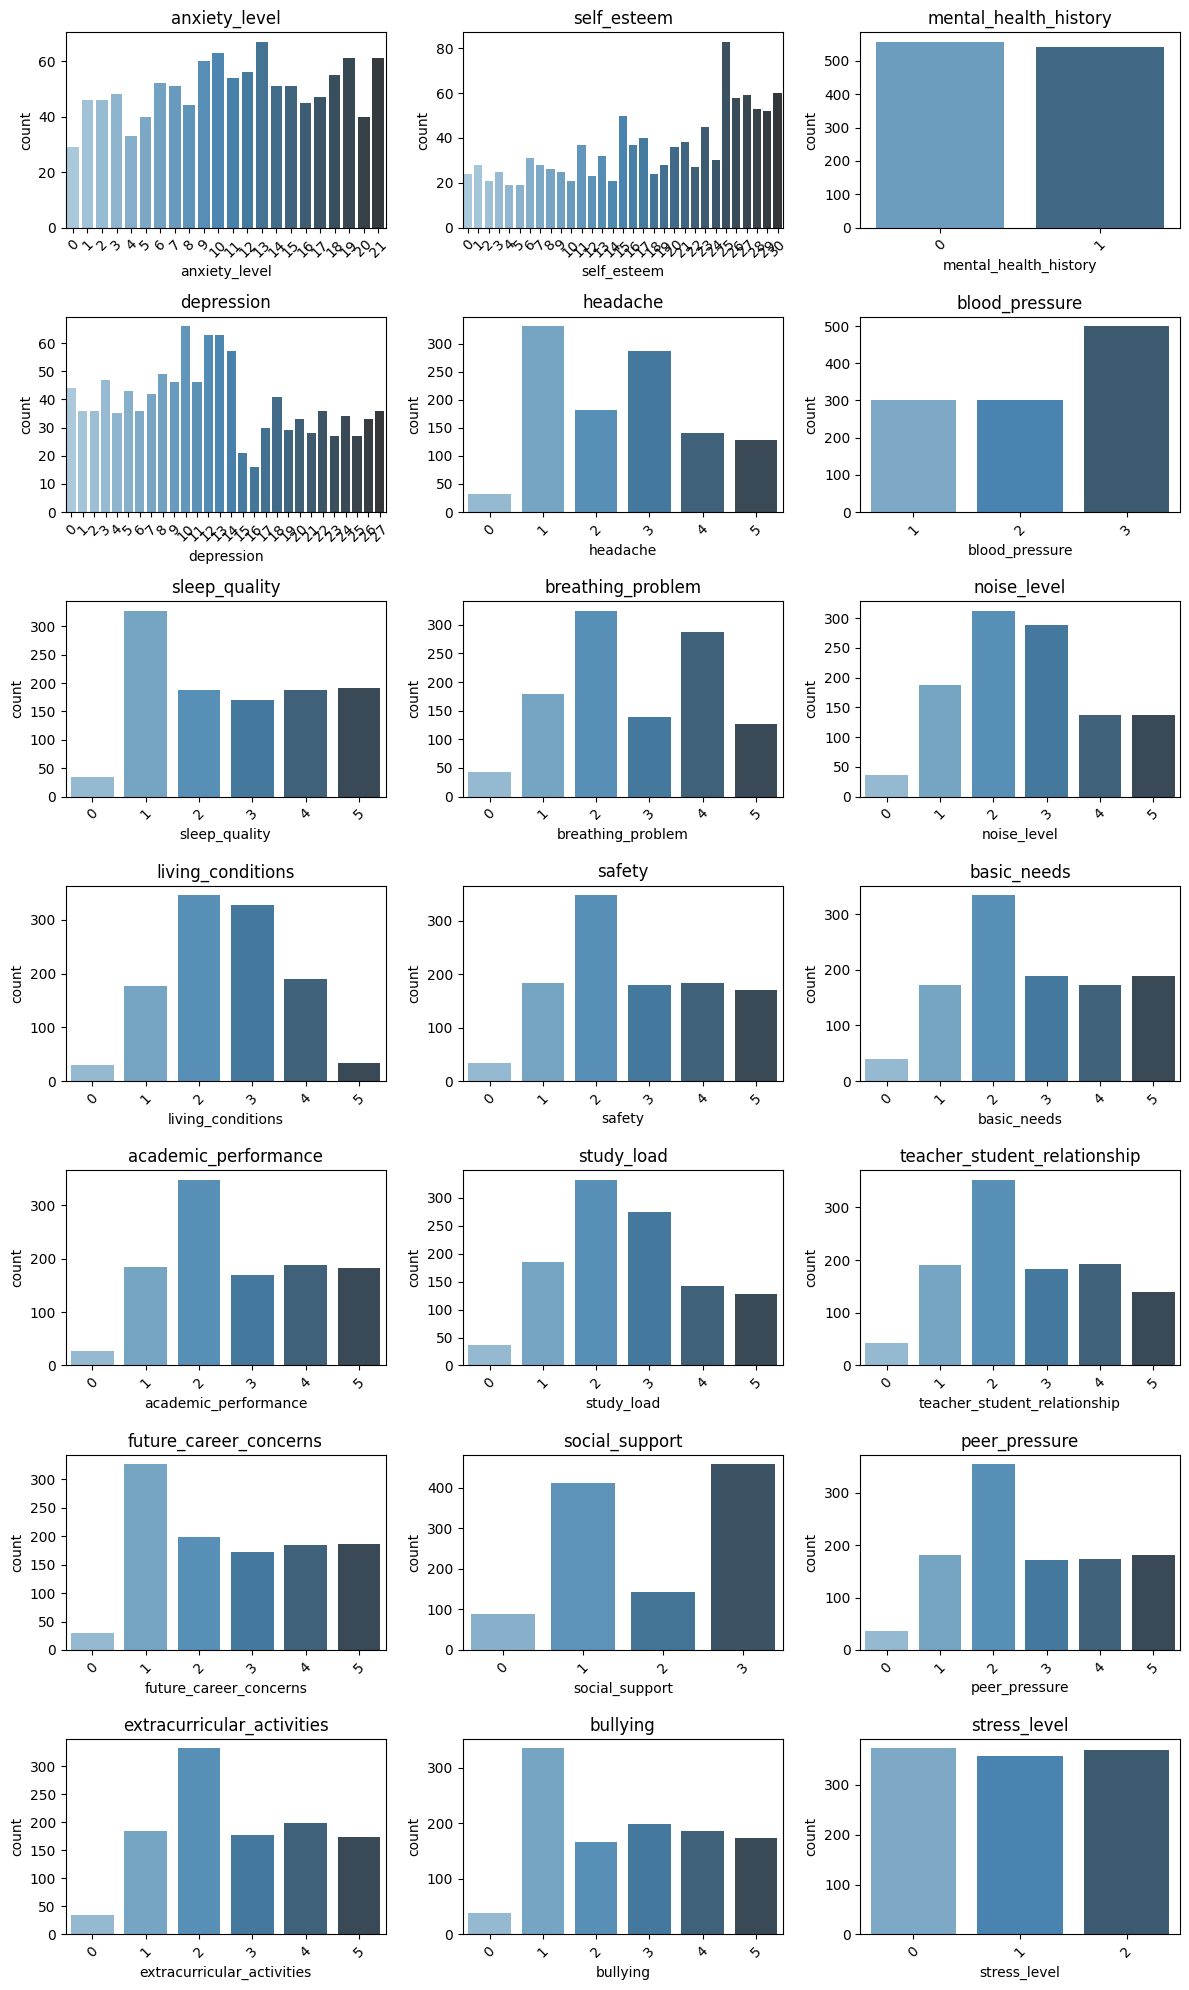

In [5]:
# Bar charts for all columns
plt.figure(figsize=(12, 20)) 

for i, column in enumerate(myd.columns, 1):
    plt.subplot(7, 3, i)
    sns.countplot(x=column, data=myd, palette='Blues_d')
    plt.xticks(rotation=45)
    plt.title(column)

plt.tight_layout()
plt.show()


- Target variables stress level seems to have a uniform distribution

Bu kod bloğu, veri setindeki tüm sütunlar için bir kutu grafiği oluşturarak sütunların dağılımını, merkezi eğilimleri ve aykırı değerlerin varlığını görsel olarak analiz etmeyi sağlar.

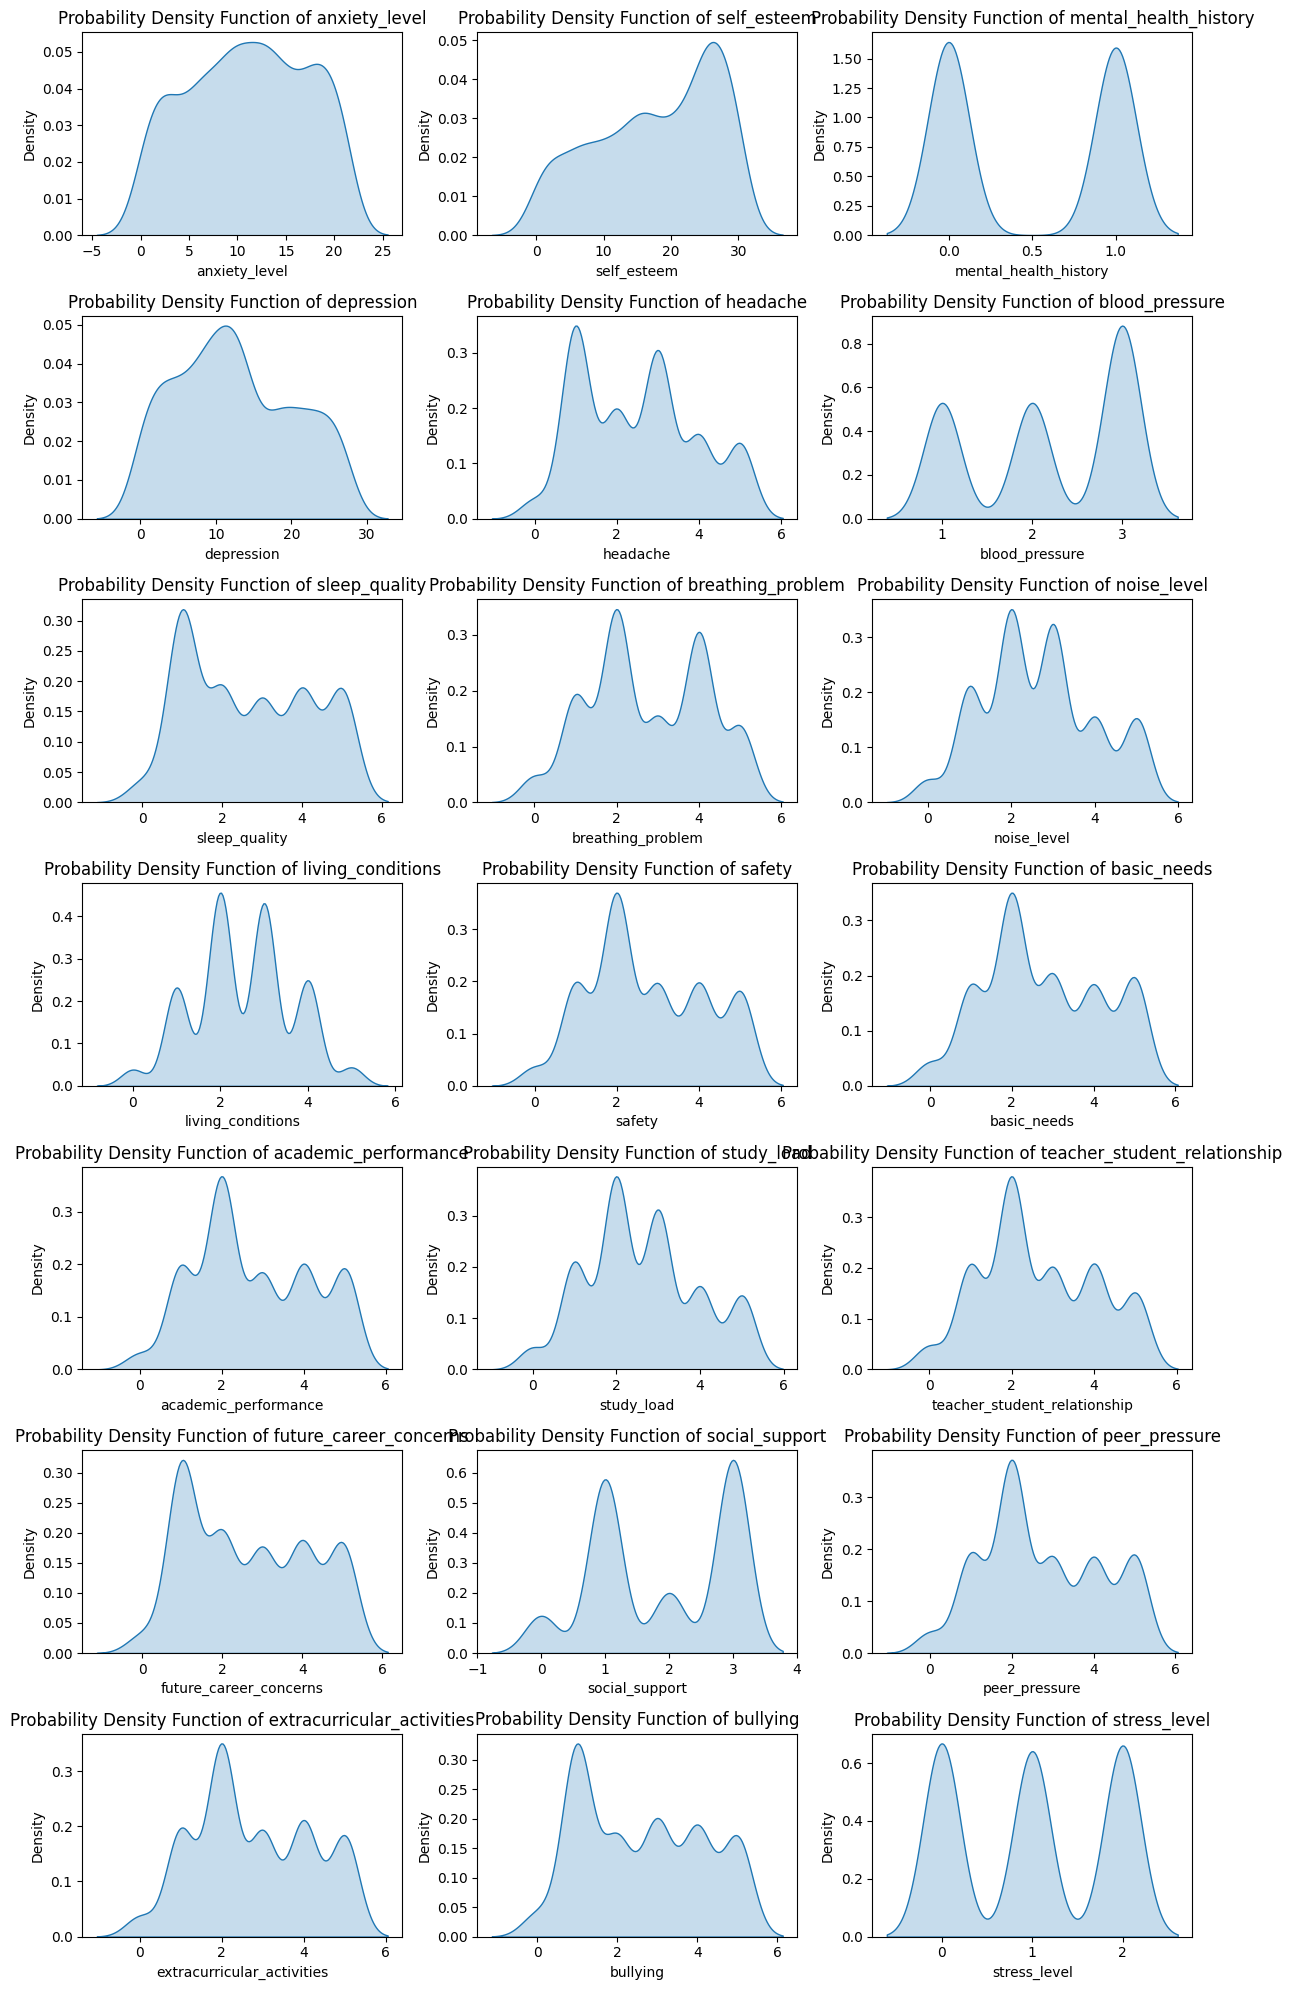

[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, min_samples_split=5, n_estimators=200; total time=   0.7s
[CV] END max_depth=10, min_samples_split=5, n_estimators=300; total time=   1.0s
[CV] END max_depth=10, min_samples_split=10, n_estimators=200; total time=   0.6s
[CV] END max_depth=20, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=20, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=20, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_depth=20, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=20, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=20, min_

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
 # Replace with your dataset path

# Set up the plotting grid
plt.figure(figsize=(12, 20))

# Loop through each column in the dataset and plot the PDF
for i, column in enumerate(myd.columns, 1):
    plt.subplot(7, 3, i)
    sns.kdeplot(myd[column], fill=True)
    plt.title(f'Probability Density Function of {column}')
    plt.ylabel('Density')
    plt.xlabel(column)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


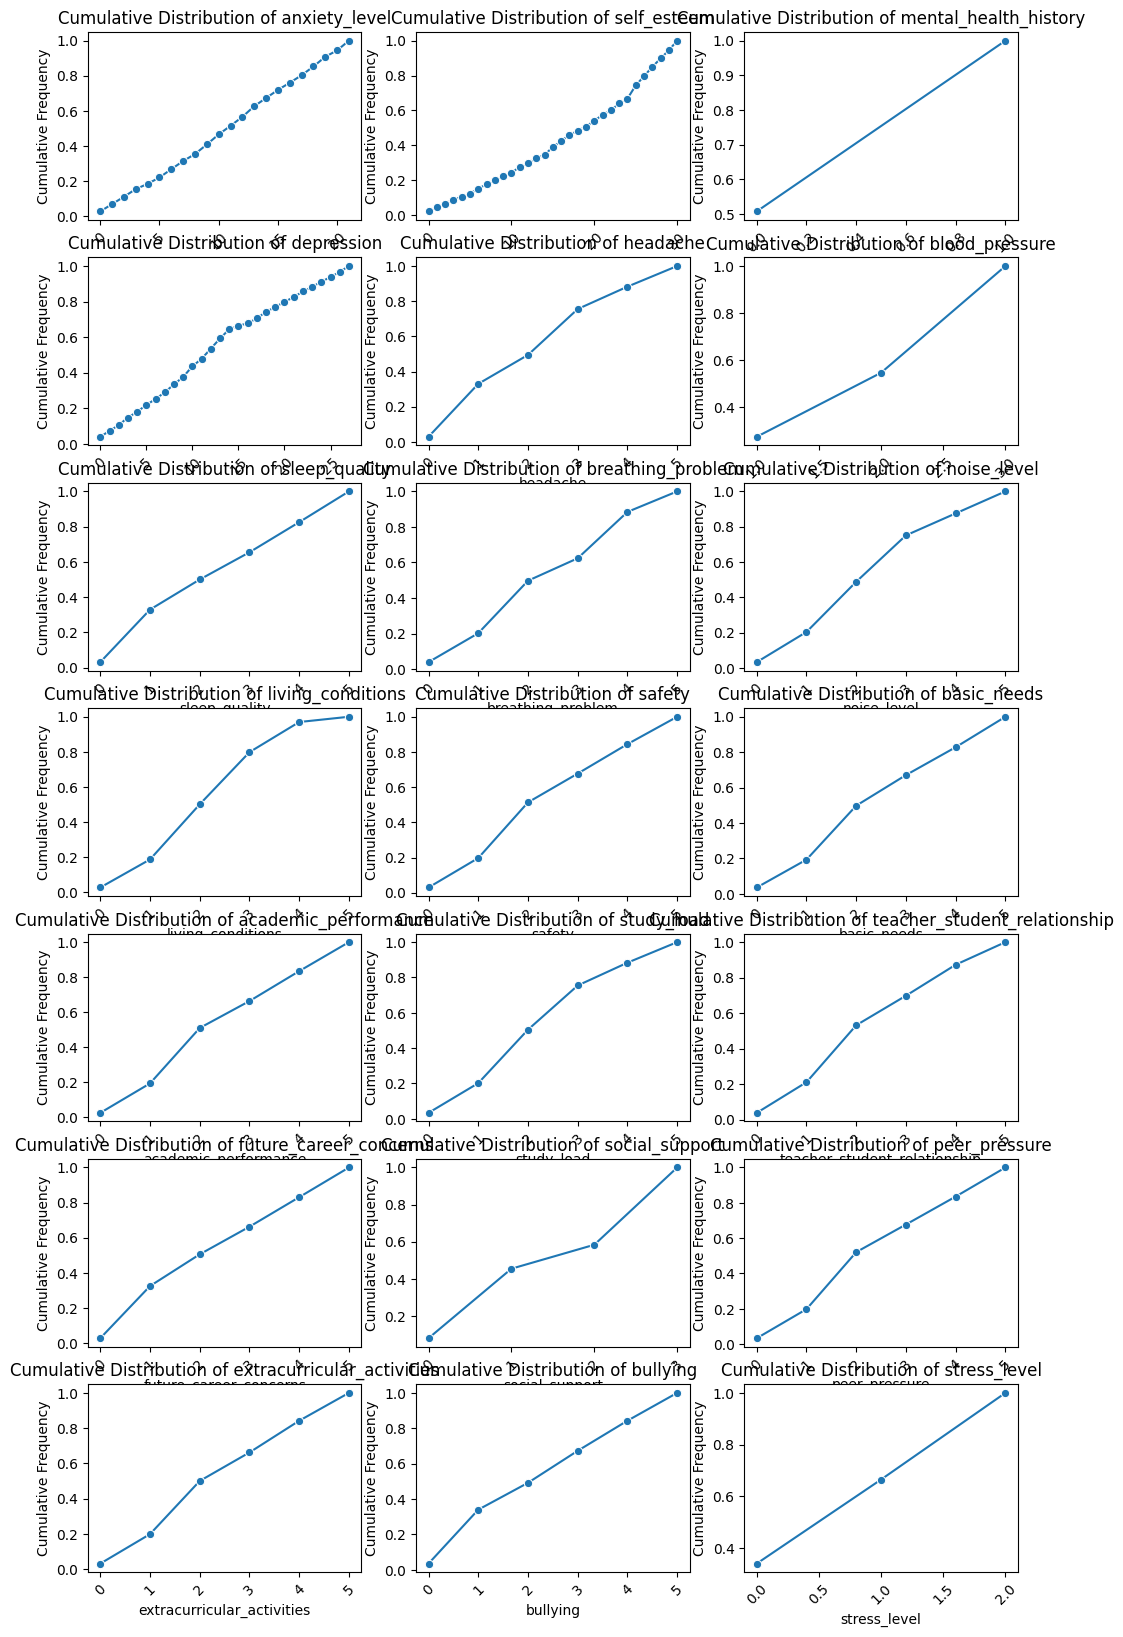

In [6]:
plt.figure(figsize=(12, 20))

for i, column in enumerate(myd.columns, 1):
    plt.subplot(7, 3, i)
    value_counts = myd[column].value_counts(normalize=True).sort_index()
    cumulative_distribution = value_counts.cumsum()
    sns.lineplot(x=cumulative_distribution.index, y=cumulative_distribution.values, marker='o')
    plt.xticks(rotation=45)
    plt.title(f'Cumulative Distribution of {column}')
    plt.ylabel('Cumulative Frequency')
    plt.xlabel(column)


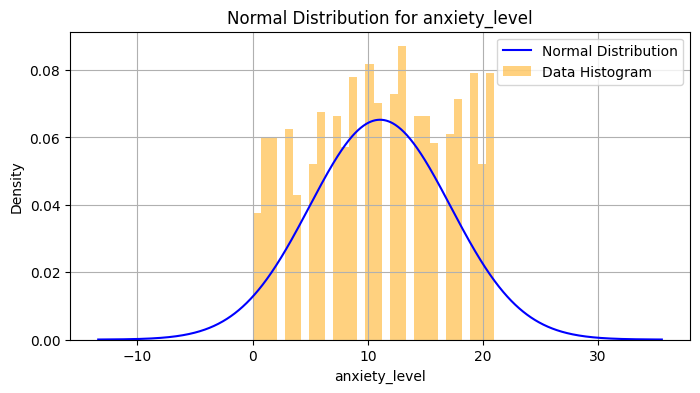

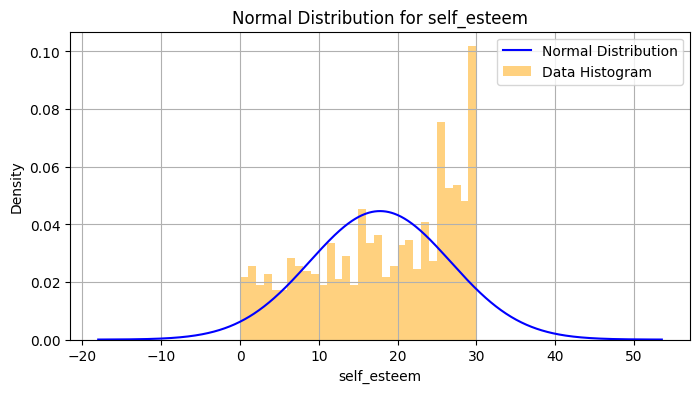

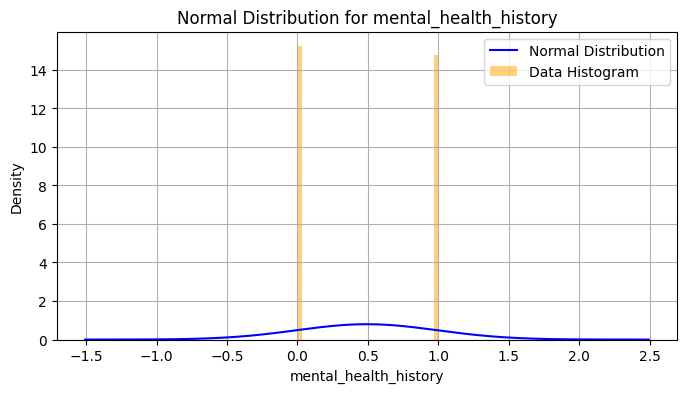

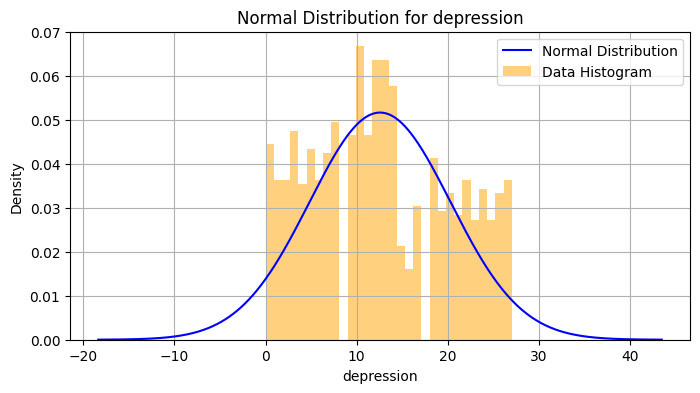

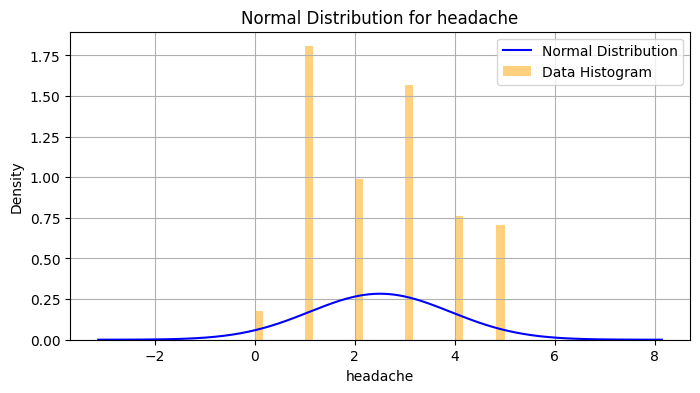

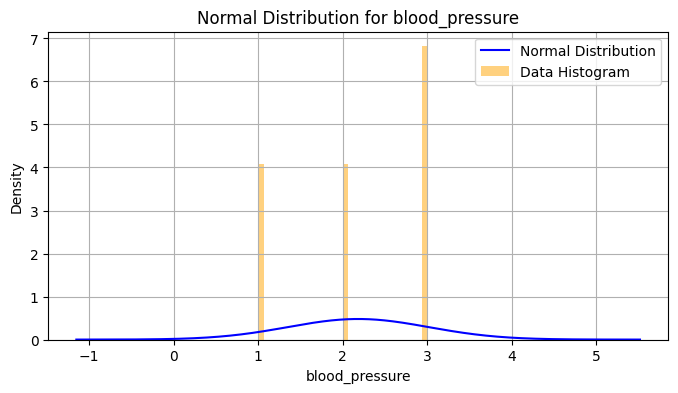

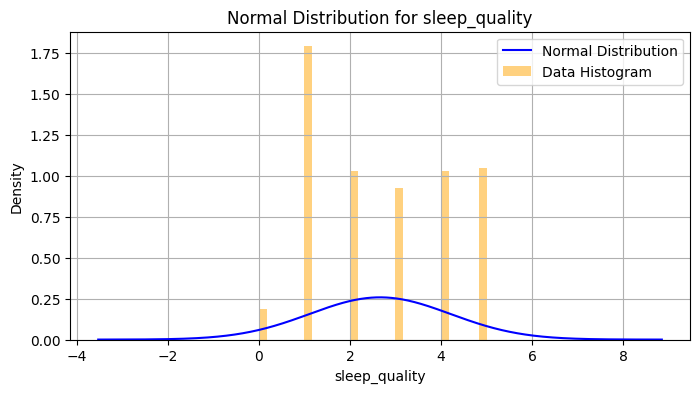

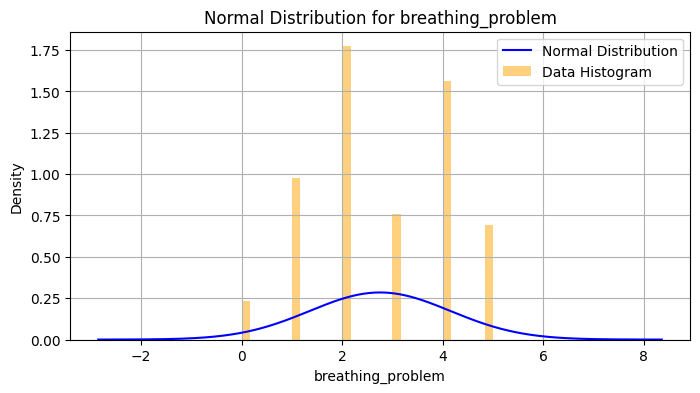

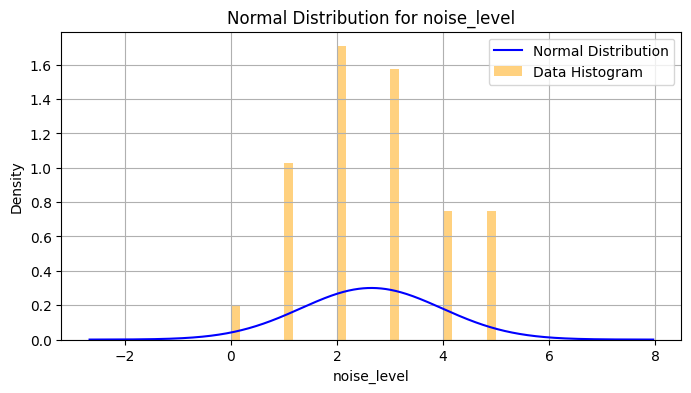

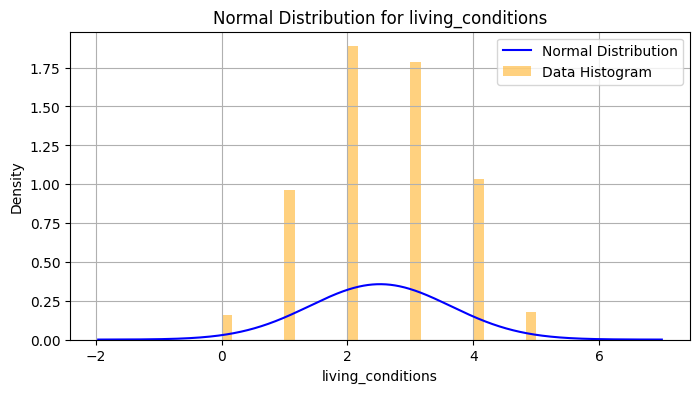

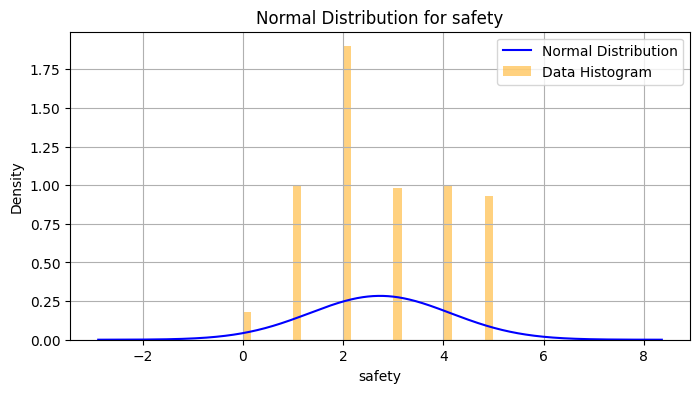

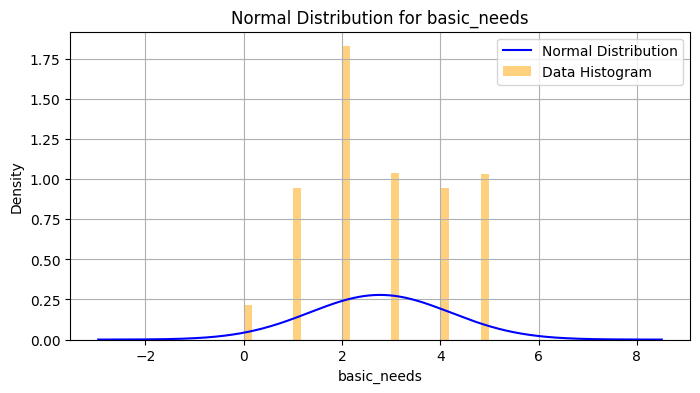

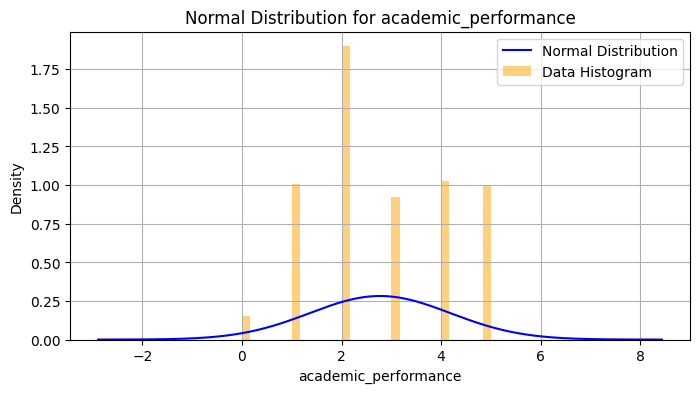

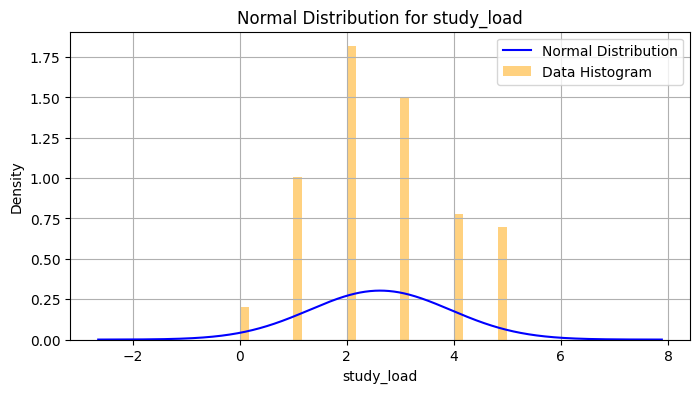

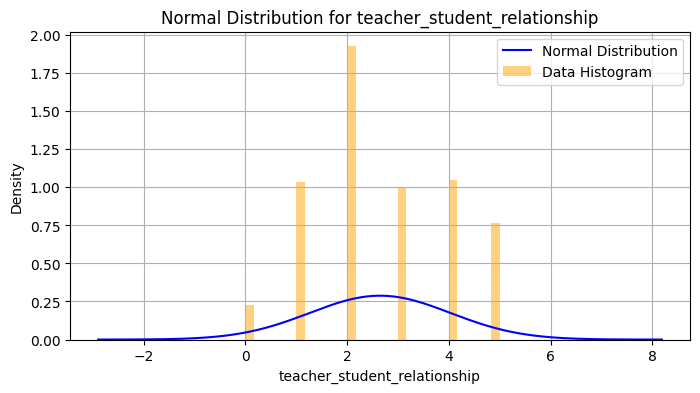

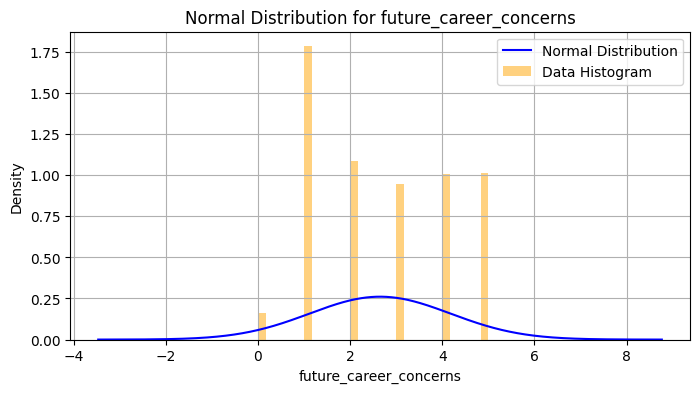

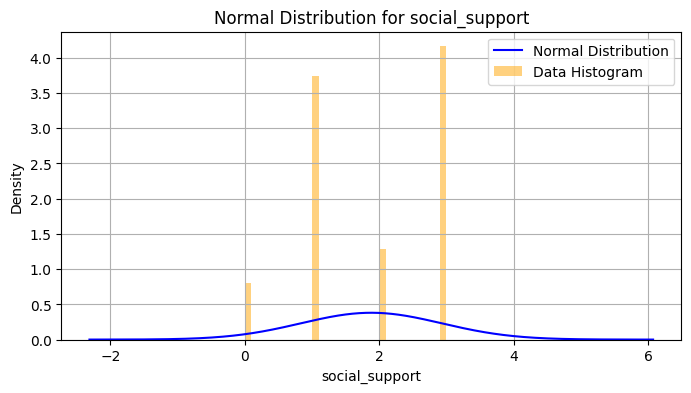

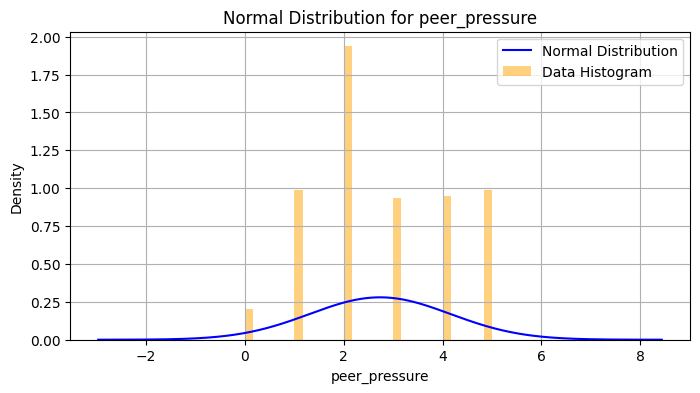

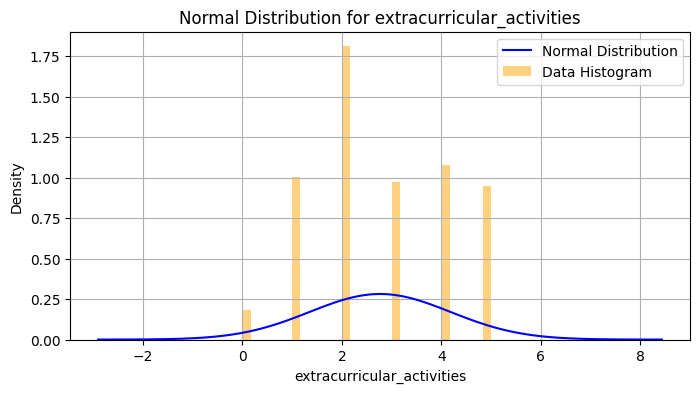

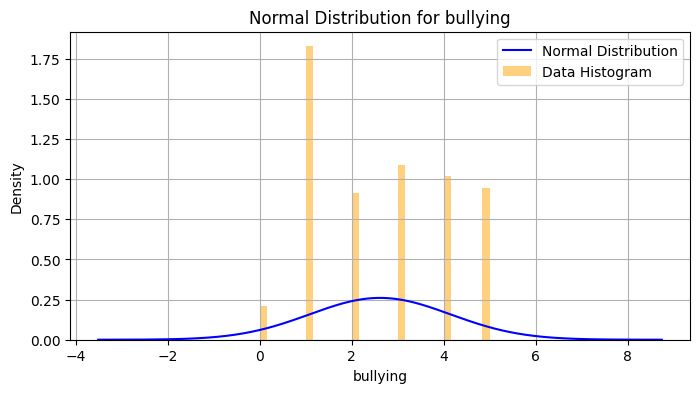

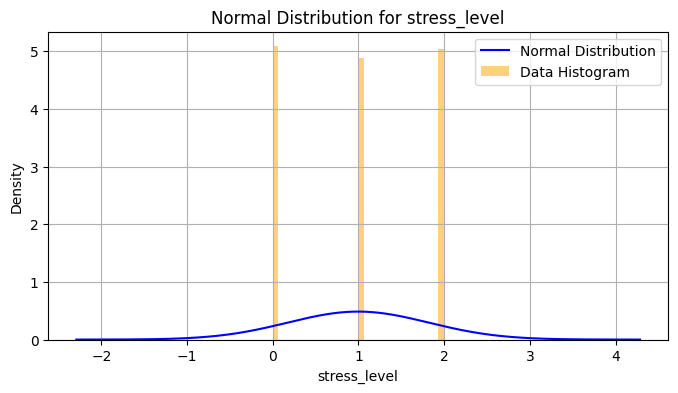

In [7]:
import scipy.stats as stats
for column in myd.columns:
        mean = myd[column].mean()
        std_dev = myd[column].std()

        # Generate values for the normal distribution
        x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 1000)
        y = stats.norm.pdf(x, mean, std_dev)

        # Plotting
        plt.figure(figsize=(8, 4))
        plt.plot(x, y, label='Normal Distribution', color='blue')
        plt.hist(myd[column], bins=30, density=True, alpha=0.5, color='orange', label='Data Histogram')
        plt.title(f'Normal Distribution for {column}')
        plt.xlabel(column)
        plt.ylabel('Density')
        plt.legend()
        plt.grid()
        plt.show()

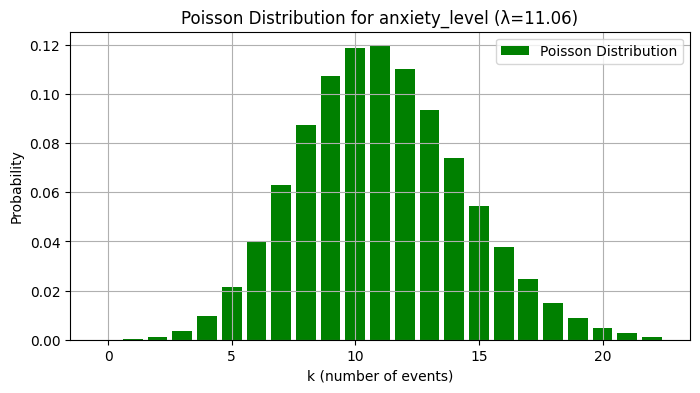

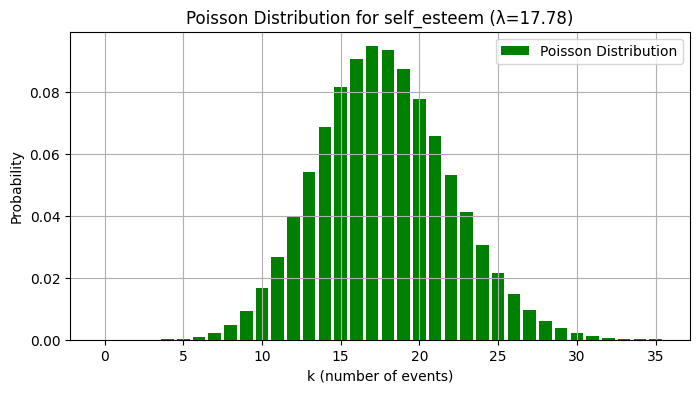

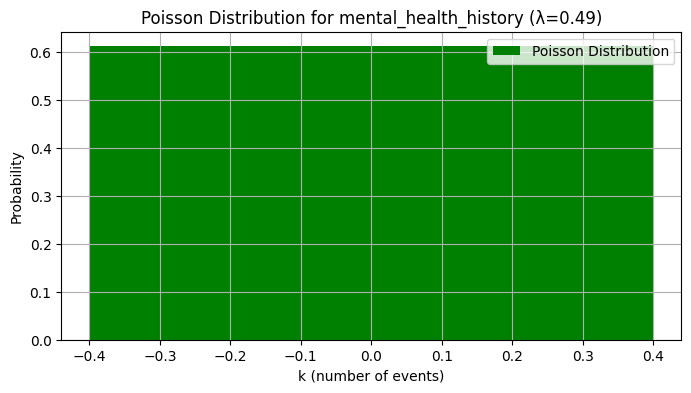

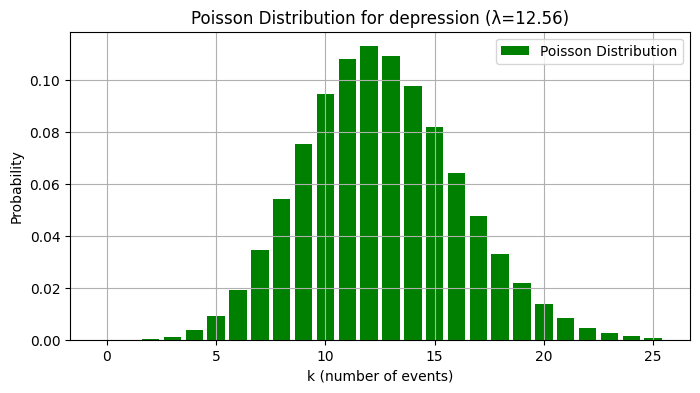

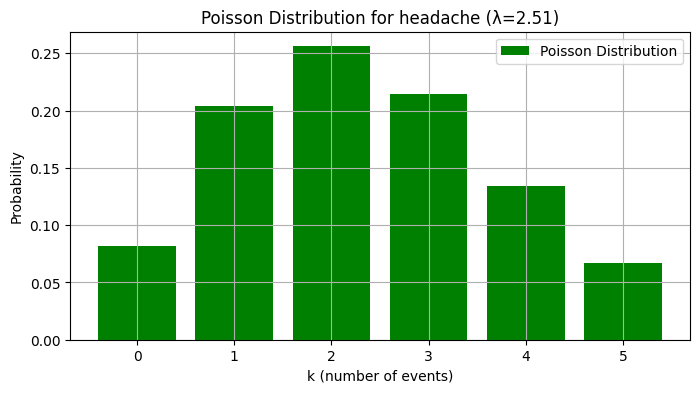

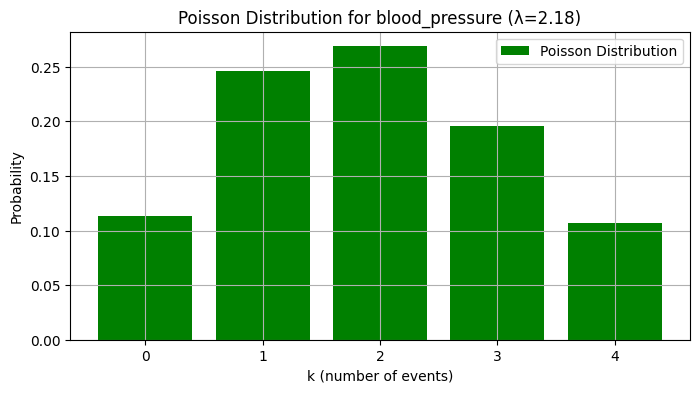

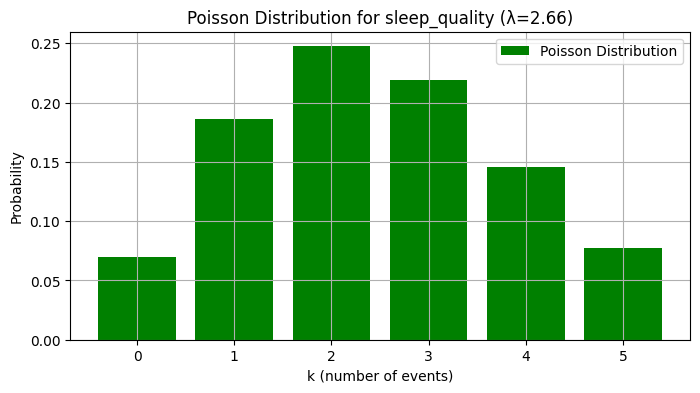

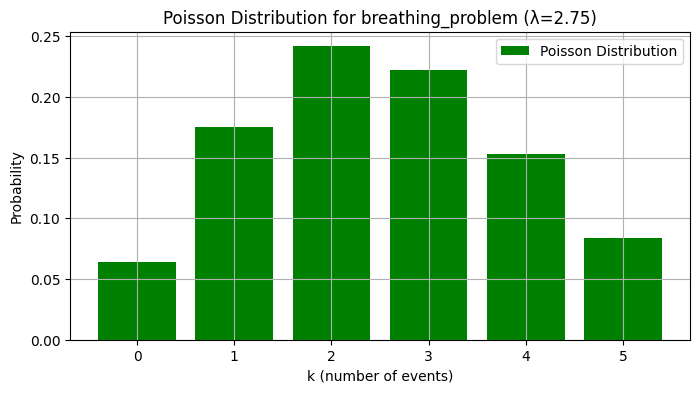

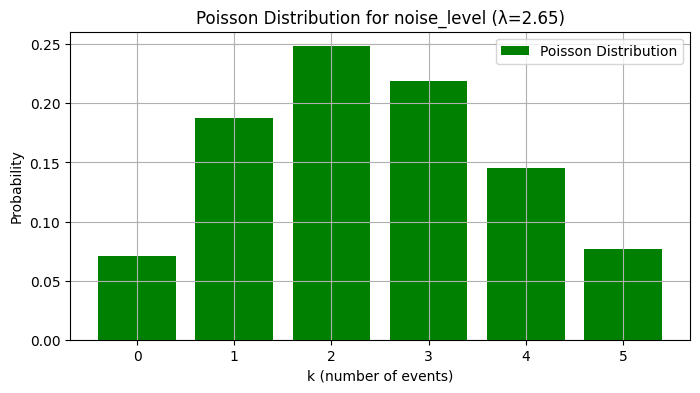

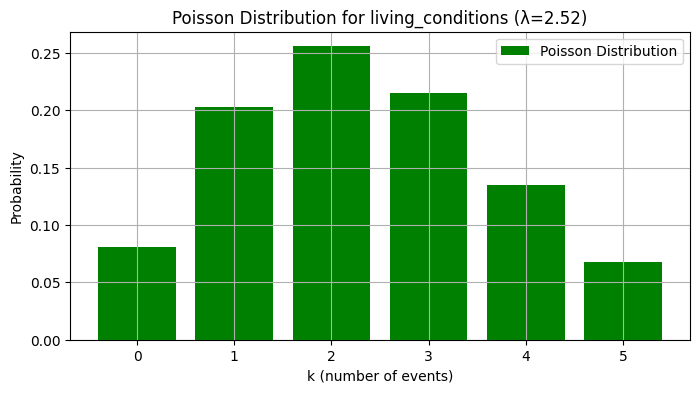

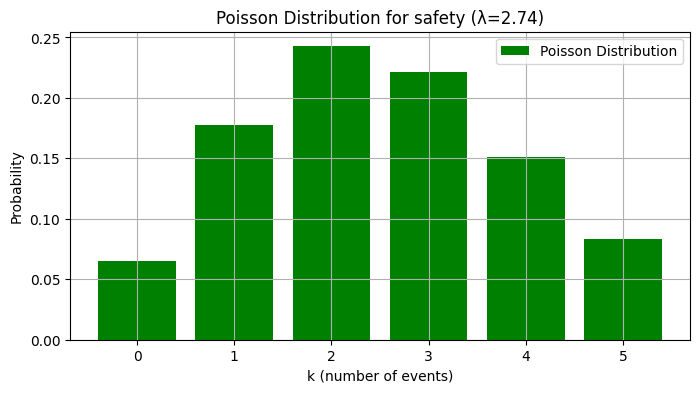

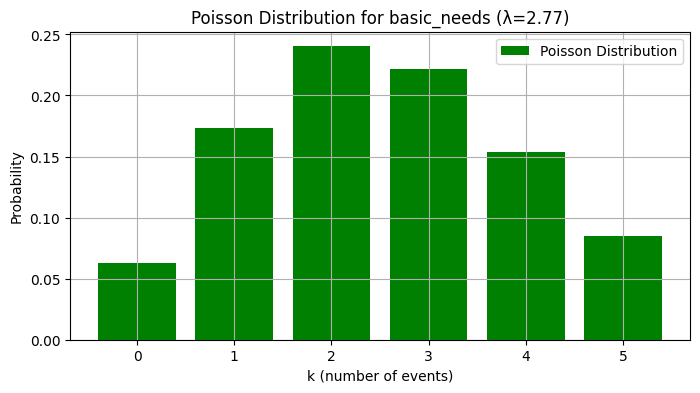

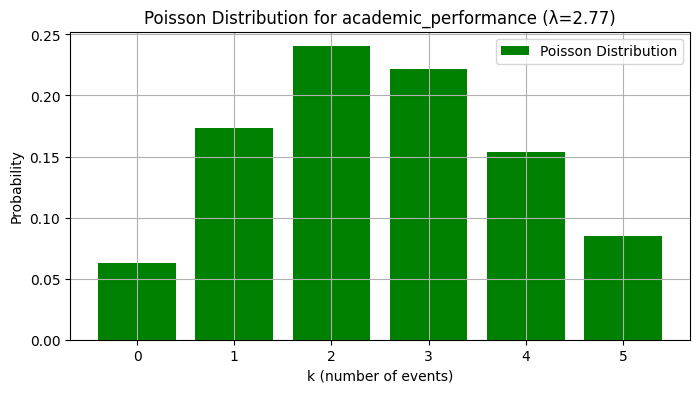

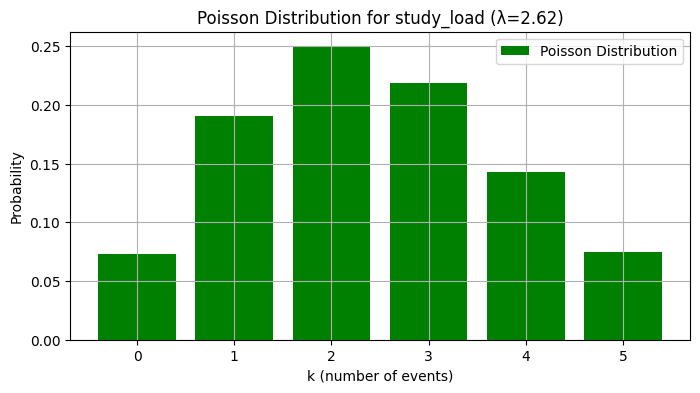

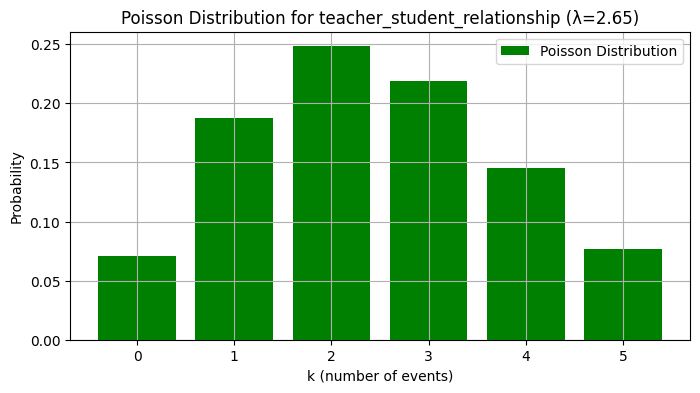

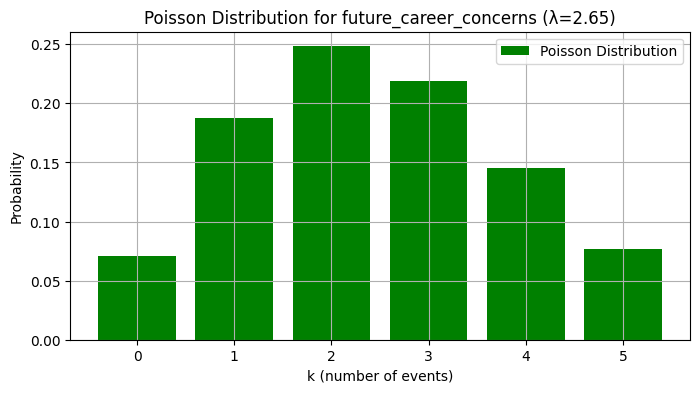

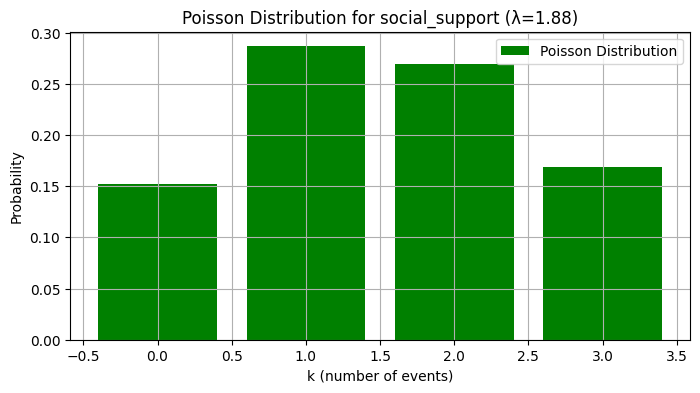

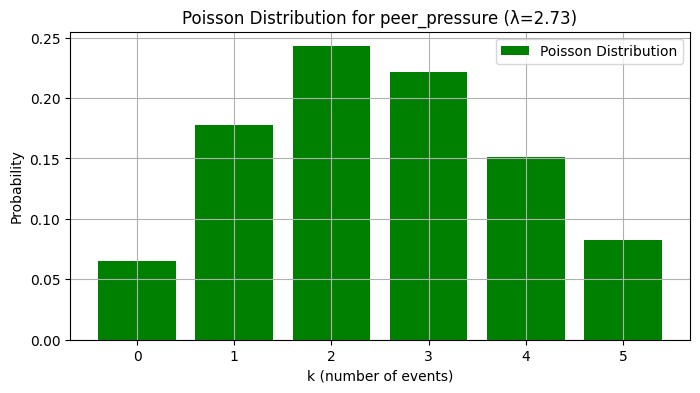

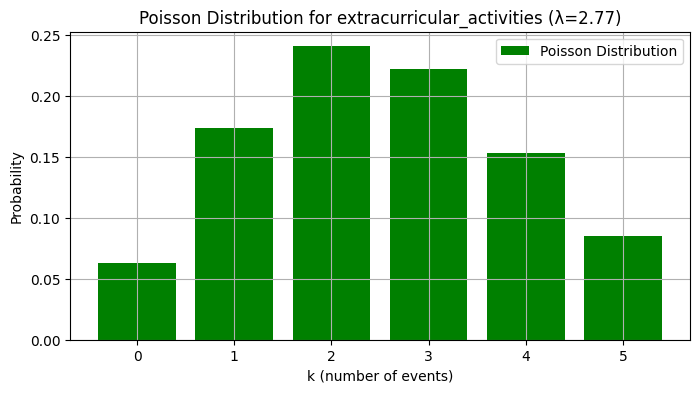

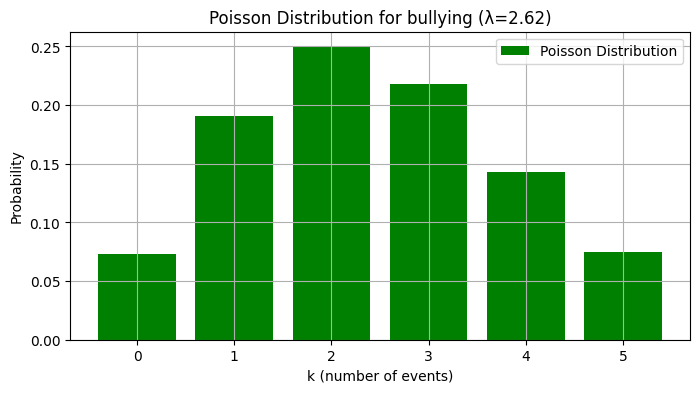

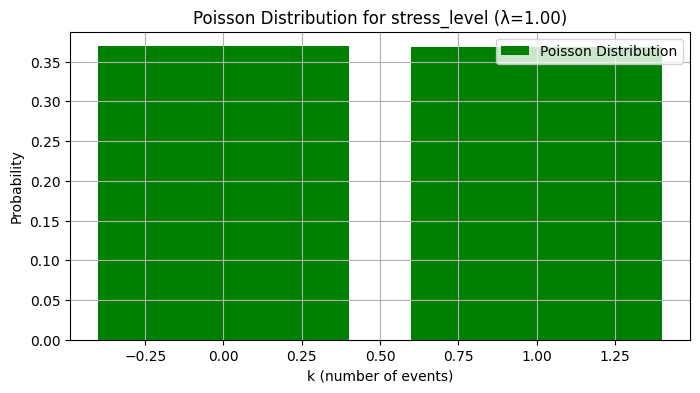

In [8]:
for column in myd.columns:
        lam = myd[column].mean()  # Use the mean as lambda

        # Generate values for the Poisson distribution
        x = np.arange(0, int(2 * lam) + 1)
        y = stats.poisson.pmf(x, lam)

        # Plotting
        plt.figure(figsize=(8, 4))
        plt.bar(x, y, label='Poisson Distribution', color='green')
        plt.title(f'Poisson Distribution for {column} (λ={lam:.2f})')
        plt.xlabel('k (number of events)')
        plt.ylabel('Probability')
        plt.legend()
        plt.grid()
        plt.show()

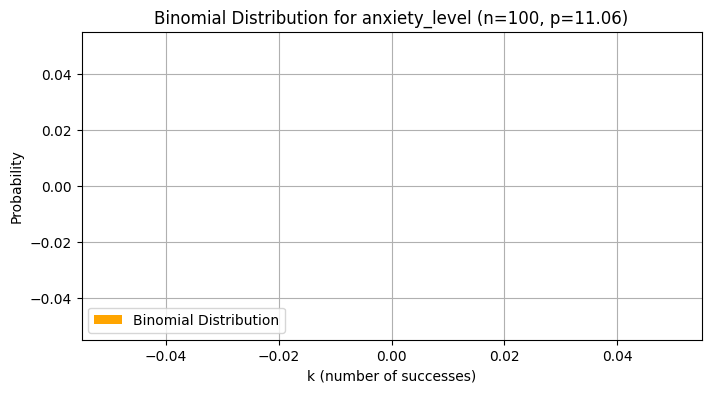

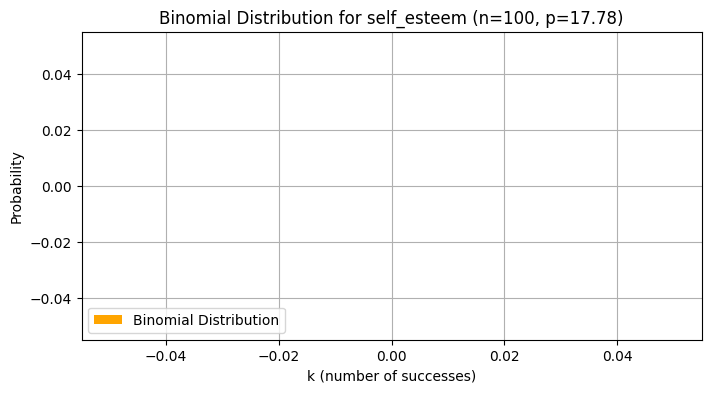

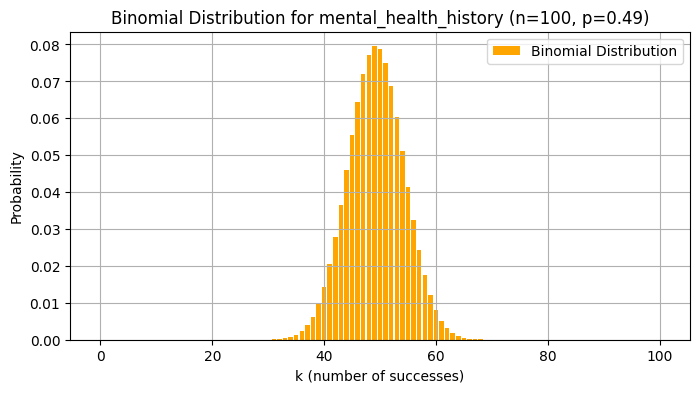

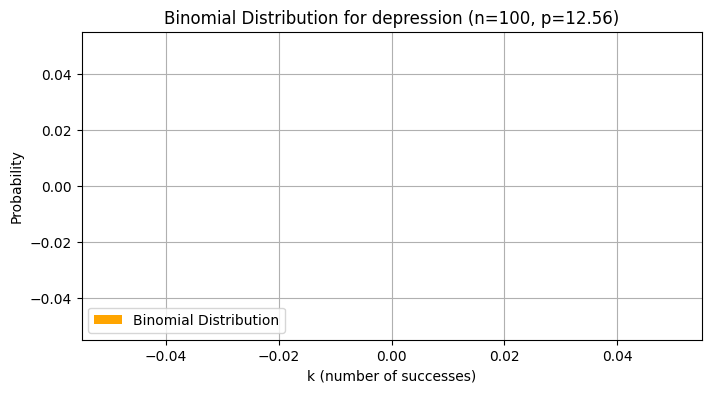

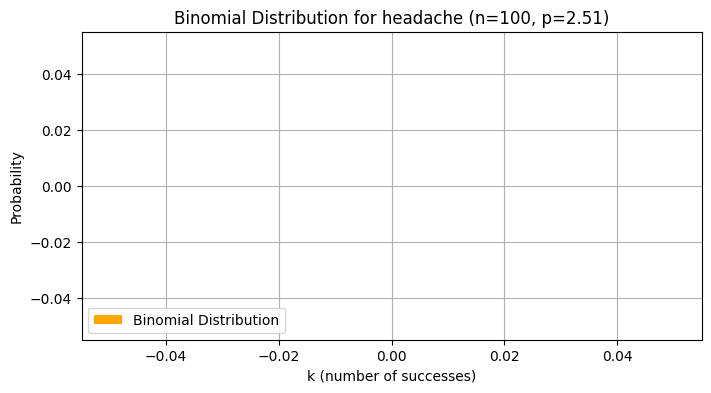

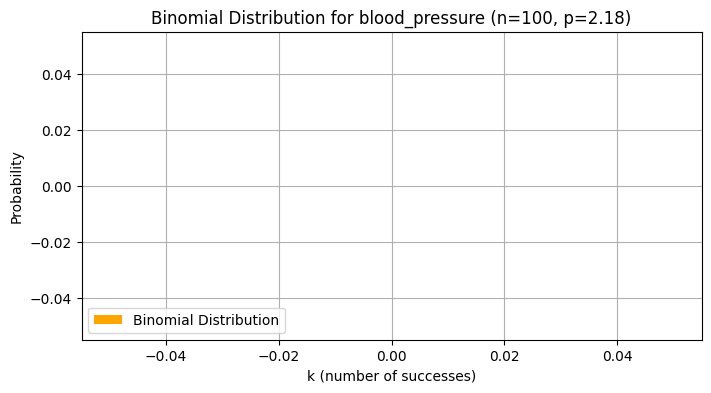

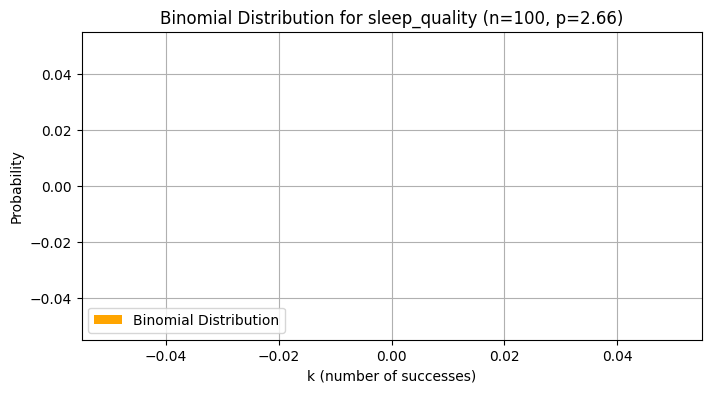

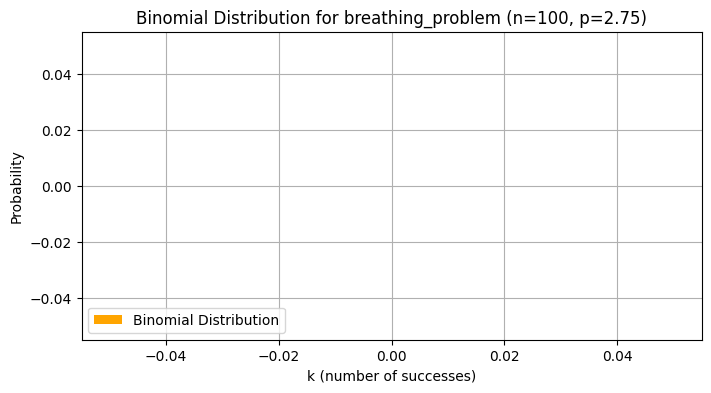

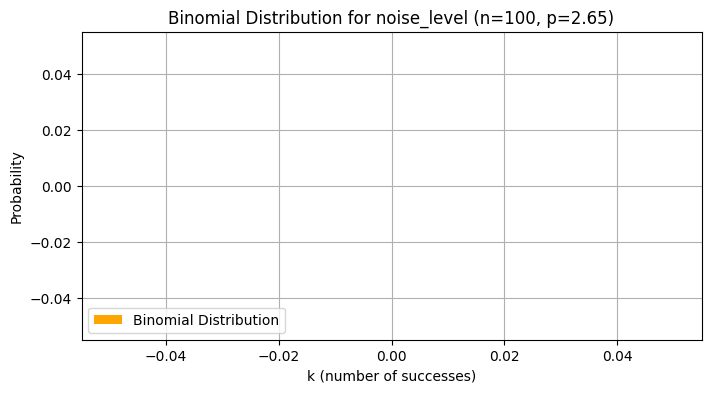

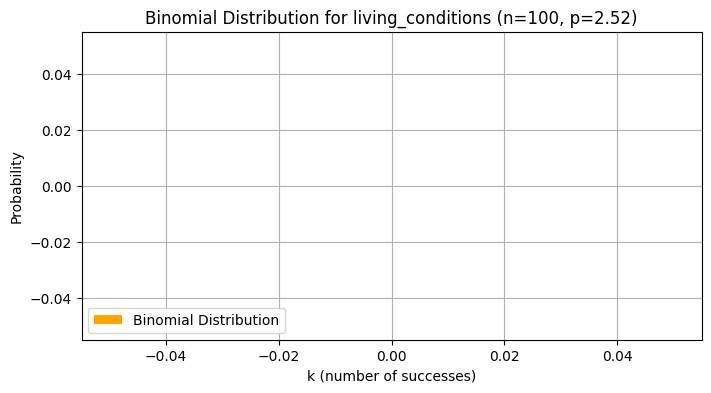

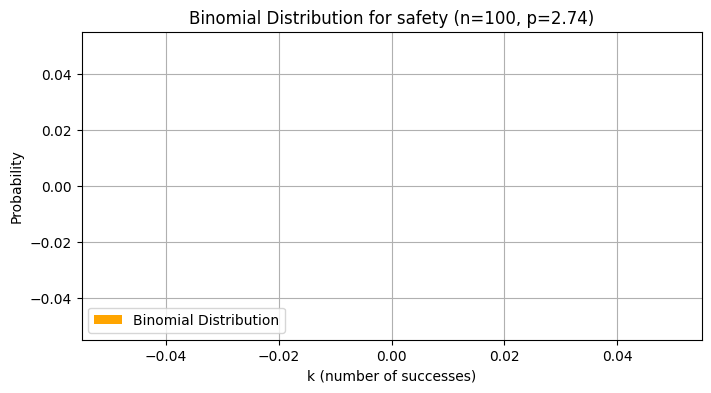

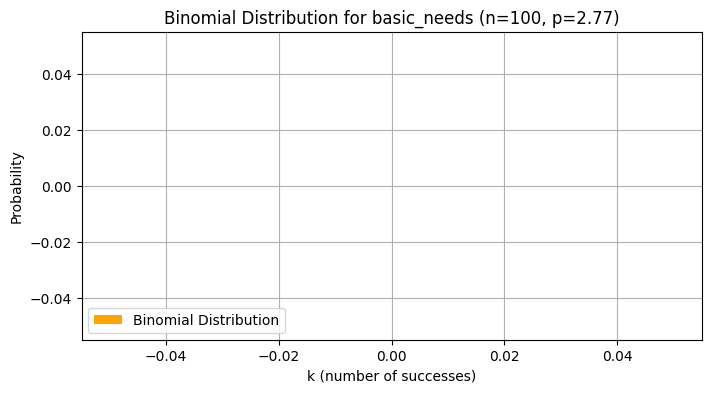

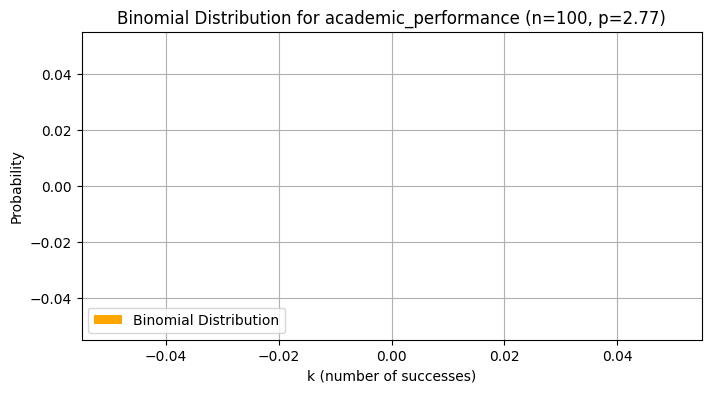

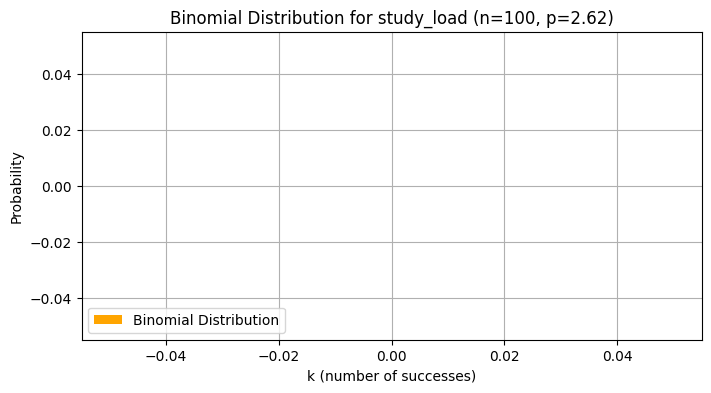

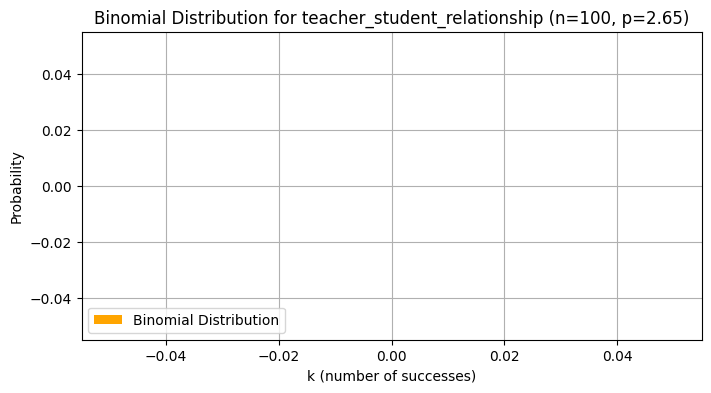

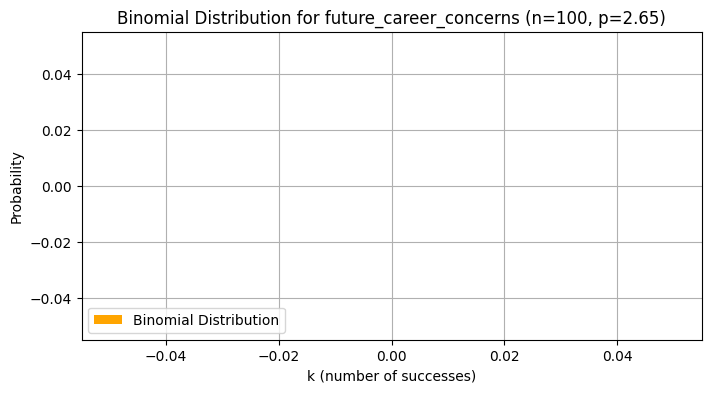

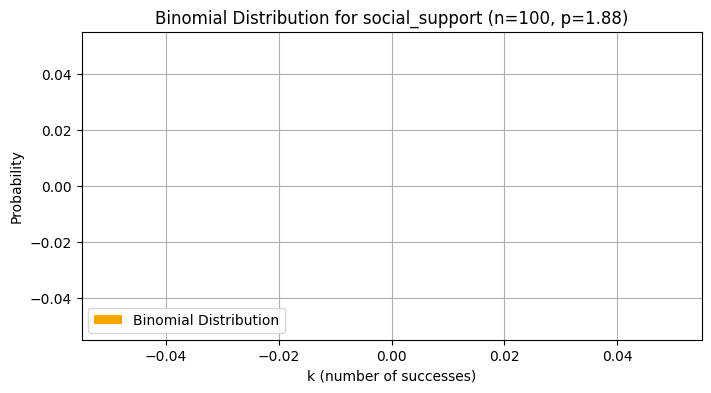

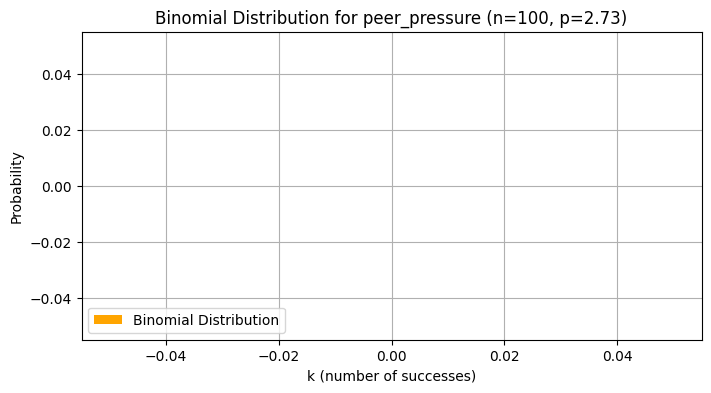

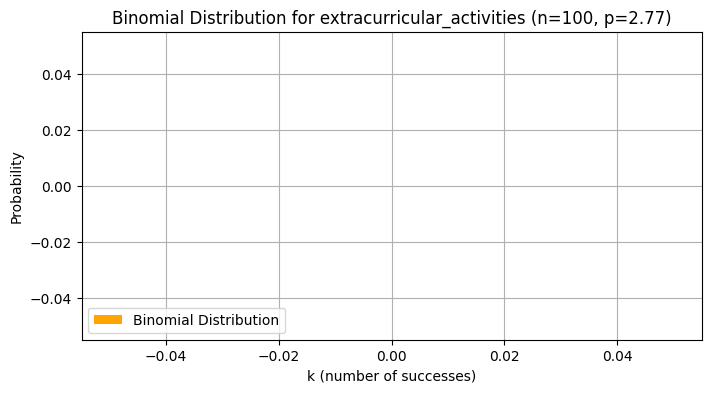

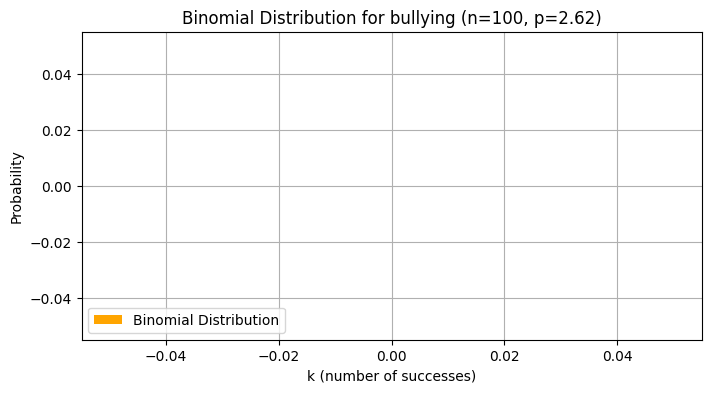

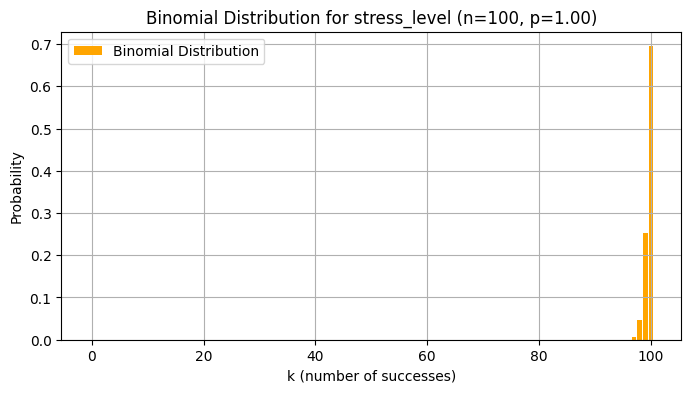

In [9]:
for column in myd.columns:
        p = myd[column].mean()  # Estimate p as the mean of the column
        n = 100
        # Generate values for the binomial distribution
        x = np.arange(0, n + 1)
        y = stats.binom.pmf(x, n, p)

        # Plotting
        plt.figure(figsize=(8, 4))
        plt.bar(x, y, label='Binomial Distribution', color='orange')
        plt.title(f'Binomial Distribution for {column} (n={n}, p={p:.2f})')
        plt.xlabel('k (number of successes)')
        plt.ylabel('Probability')
        plt.legend()
        plt.grid()
        plt.show()

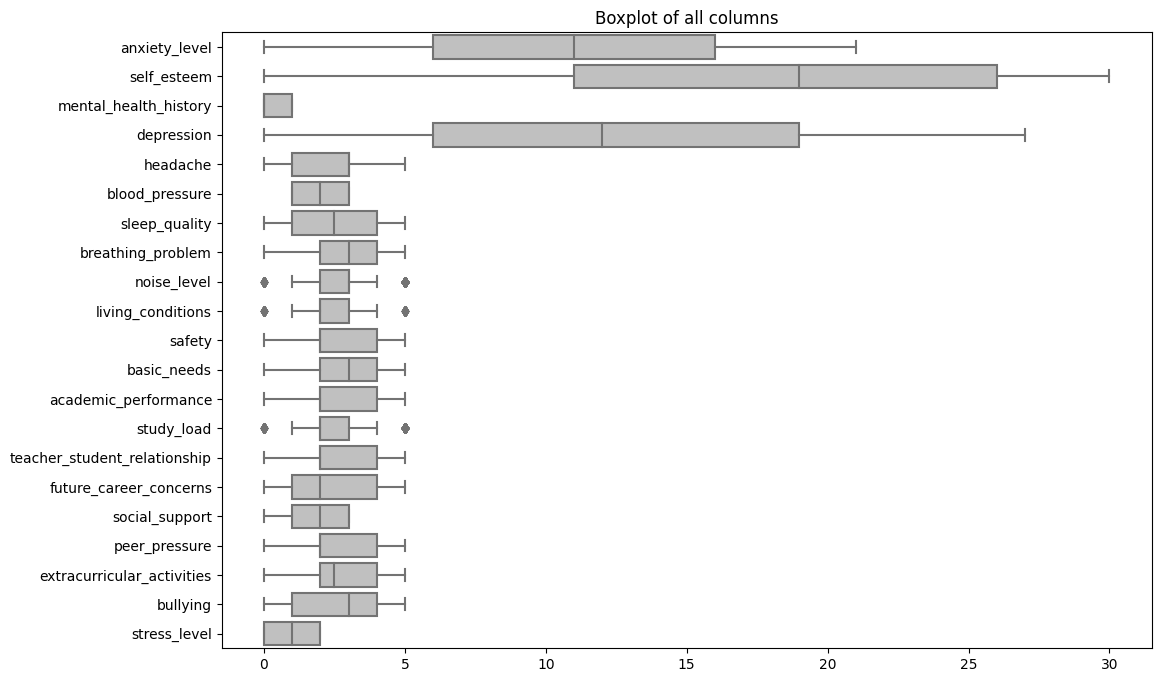

In [10]:
# Box plots for all columns

plt.figure(figsize= (12,8))
sns.boxplot(data=myd, orient='h', color='silver')
plt.title('Boxplot of all columns')
plt.show()

hello mouleendra

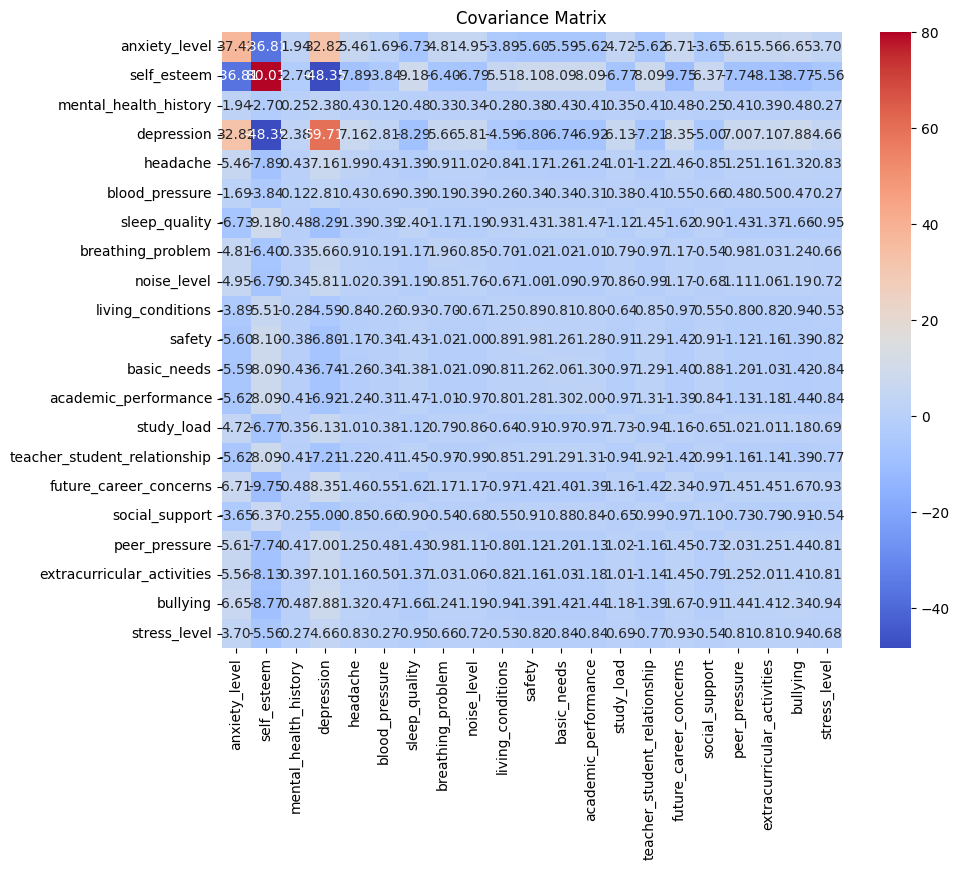

In [11]:
cov_matrix = myd.cov()

# Function to plot the covariance matrix
def plot_covariance_matrix(cov_matrix):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cov_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
    plt.title('Covariance Matrix')
    plt.show()

# Call the function
plot_covariance_matrix(cov_matrix)

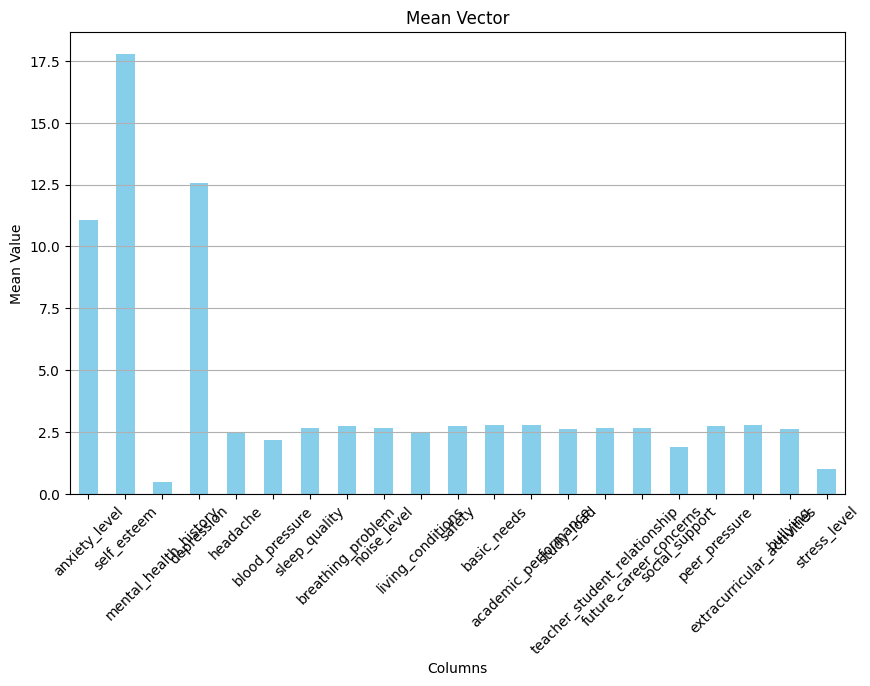

In [12]:
mean_vector = myd.mean()

# Function to plot the mean vector
def plot_mean_vector(mean_vector):
    plt.figure(figsize=(10, 6))
    mean_vector.plot(kind='bar', color='skyblue')
    plt.title('Mean Vector')
    plt.xlabel('Columns')
    plt.ylabel('Mean Value')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()

# Call the function
plot_mean_vector(mean_vector)

- Most variables are ona scale of 1-5
- Anxiety, self esteem, depressioon have larger range so keep in mind when furthur EDA
- Mental helath history binary
- Blood pressure scale 1-3
- Target variable stress level is on a scale 1-3

Bu kod bloğu, veri setindeki öğrencilerin zihinsel sağlık geçmişi olanların yüzdesini hesaplar ve ekrana yazdırır.

In [13]:
# Percentage of students with mental health history
mental_health_history = myd['mental_health_history'].value_counts(normalize=True) * 100
print('Percentage of students with mental health history:', mental_health_history[1])


Percentage of students with mental health history: 49.27272727272727


Bu kod bloğu, veri setindeki değişkenler arasındaki ilişkiyi görselleştirmek için bir korelasyon matrisi oluşturur. Seaborn kütüphanesini kullanarak bir ısı haritası (heatmap) oluşturur. myd.corr() ifadesi, veri setindeki değişkenler arasındaki korelasyon matrisini hesaplar.

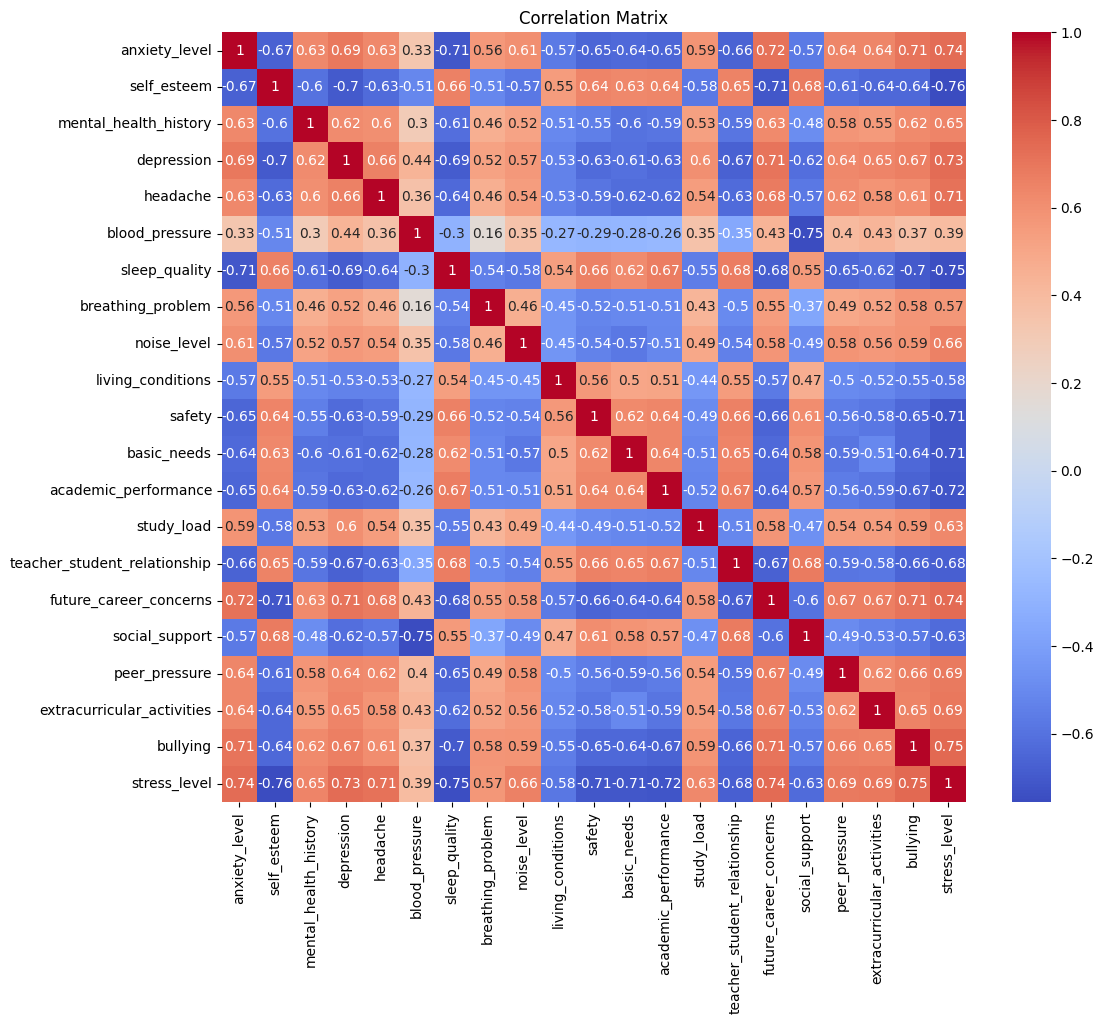

In [14]:
# Correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(myd.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


### Target variable analysis

Bu kod bloğu, veri setindeki "stress_level" özelliği ile diğer özellikler arasındaki korelasyonu görsel olarak göstermek için bir ısı haritası oluşturur. Korelasyon, özellikler arasındaki ilişkiyi belirtir. Bu ısı haritası, her özelliğin "stress_level" ile nasıl ilişkili olduğunu ve hangi özelliklerin stres düzeyi ile daha güçlü veya daha zayıf bir şekilde ilişkilendiğini gösterir.

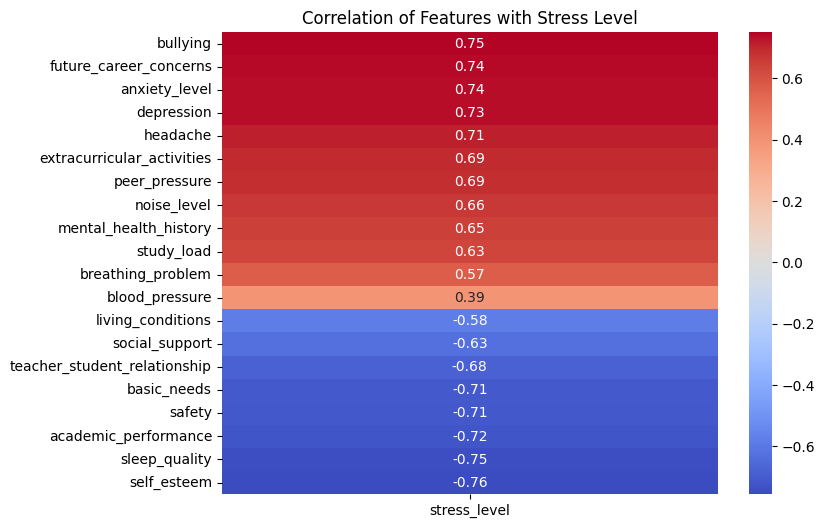

In [15]:
# Correlation heat map only stress level 
correlation = myd.corr()
correlation_stress = correlation['stress_level'].sort_values(ascending=False)
correlation_stress = correlation_stress.drop('stress_level')
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_stress.to_frame(), annot=True, cmap='coolwarm')
plt.title('Correlation of Features with Stress Level')
plt.show()


Bu kod bloğu, "stress_level" özniteliğine göre gruplanmış veri setindeki diğer özniteliklerin ortalama değerlerini hesaplar. Yani, her bir stres seviyesi için diğer özniteliklerin ortalama değerlerini içeren bir tablo oluşturur. Bu, her stres seviyesinin diğer özniteliklerle ilişkisini görmemizi sağlar.

In [16]:
# Average score for each stress level
average_stress = myd.groupby('stress_level').mean()
average_stress

anxiety_level  self_esteem  mental_health_history  depression  \
stress_level                                                                  
0                  5.431635    25.252011               0.101877    6.013405   
1                 11.430168    19.262570               0.488827   11.874302   
2                 16.401084     8.780488               0.891599   19.829268   

              headache  blood_pressure  sleep_quality  breathing_problem  \
stress_level                                                               
0             1.313673        2.195710       4.126005           1.697051   
1             2.460894        1.324022       2.530726           2.927374   
2             3.761518        3.000000       1.303523           3.653117   

              noise_level  living_conditions    safety  basic_needs  \
stress_level                                                          
0                1.648794           3.313673  4.099196     4.144772   
1                2.511173           2.502793  2.416201     2.477654   
2                3.794038           1.728997  1.672087     1.672087   

              academic_performance  study_load  teacher_student_relationship  \
stress_level                                                                   
0                         4.142091    1.654155                      3.927614   
1                         2.491620    2.533520                      2.357542   
2                         1.661247    3.685637                      1.636856   

              future_career_concerns  social_support  peer_pressure  \
stress_level                                                          
0                           1.335121        2.541555       1.675603   
1                           2.522346        2.178771       2.458101   
2                           4.100271        0.926829       4.073171   

              extracurricular_activities  bullying  
stress_level                                        
0                               1.715818  1.254692  
1                               2.480447  2.555866  
2                               4.108401  4.054201


Bu kod bloğu, stres seviyeleriyle ilgili istatistiksel bilgileri hesaplar ve bu bilgileri görselleştirir. İlk olarak, veri setindeki stres seviyelerinin ortalama değerini hesaplar ve ekrana yazdırır. Ardından, stres seviyelerinin yüzdelik dağılımını gösteren bir pasta grafiği oluşturur. Bu, veri setindeki stres seviyelerinin genel dağılımını ve ortalama stres seviyesini anlamamıza yardımcı olur.

Average Stress Level: 0.9963636363636363


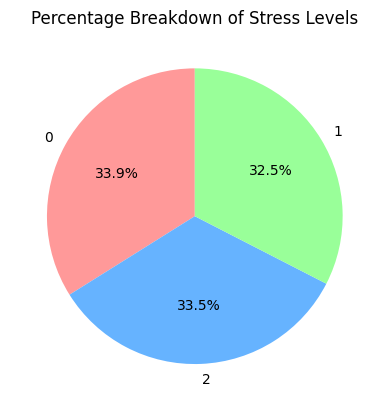

In [17]:
# Average stress level
average_stress_level = myd['stress_level'].mean()
print('Average Stress Level:', average_stress_level)

# Percentage breakdown of stress levels pie chart
myd['stress_level'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Percentage Breakdown of Stress Levels')
plt.ylabel('')
plt.show() 


Bu kod bloğu, veri setini modelin öğrenmesi için kullanılacak özellikler (X) ve hedef değişken (y) olarak ayırır. 'stress_level' sütunu hedef değişken olarak kabul edilir ve diğer sütunlar özellikler olarak kabul edilir. Bu sayede, model öğrenme işlemi için girdi ve çıktı verileri doğru şekilde hazırlanmış olur.

In [18]:
# Split the data into features and target
X = myd.drop('stress_level', axis=1)
y = myd['stress_level']

Bu kod bloğu, veri setindeki özellikleri (X) standartlaştırır. Standartlaştırma işlemi, her bir özelliğin ortalamasını 0 ve standart sapmasını 1 olarak dönüştürür. Bu, farklı ölçeklerdeki özellik değerlerini aynı ölçek düzeyine getirerek, makine öğrenimi modellerinin daha iyi performans göstermesine yardımcı olur.

In [19]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA and Factor Analysis

Using more so for latent variable discovery as compared to dimensionality reduction.


### Assessing suitability of the data for PCA and factor analysis

In [20]:
# KMO Test
#from factor_analyzer.factor_analyzer import calculate_kmo
#kmo_all, kmo_model = calculate_kmo(X_scaled)

#print(kmo_all)
#print(kmo_model)


In [21]:
# Bartlett's Test 
#from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
#chi_square_value, p_value = calculate_bartlett_sphericity(X_scaled)

#print("Chi-square value:", chi_square_value)
#print("p-value:", p_value)

### How many components to use?

Bu kod bloğu, Temel Bileşen Analizi (PCA) kullanarak veri setinin boyutunu azaltmayı ve değişkenliğin nasıl dağıldığını görselleştirmeyi amaçlar. PCA'nın temel amacı, veri setindeki değişkenlik miktarını maksimize eden yeni bir özellik altkümesi oluşturmaktır. Bu plot, her bir bileşenin açıklanan varyansını göstererek, veri setindeki varyansın dağılımını analiz etmeyi sağlar.

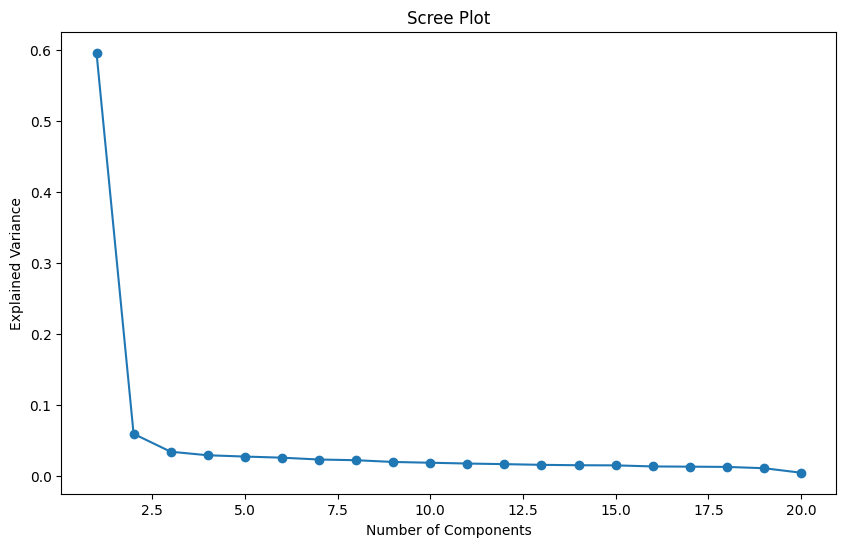

In [22]:
# PCA

# Scree plot
pca = PCA()
pca.fit(X_scaled)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.show()

Bu kod bloğu, Temel Bileşen Analizi (PCA) yöntemini kullanarak veri setini iki boyuta indirir ve bu indirgenmiş boyutta veriyi görselleştirir. PCA, verinin karmaşıklığını azaltırken temel yapısal özelliklerini korur. Bu görselleştirme, verinin iki boyutlu bir uzayda nasıl dağıldığını ve stres seviyeleri gibi hedef değişkenlerin bu dağılımdaki rollerini gösterir.

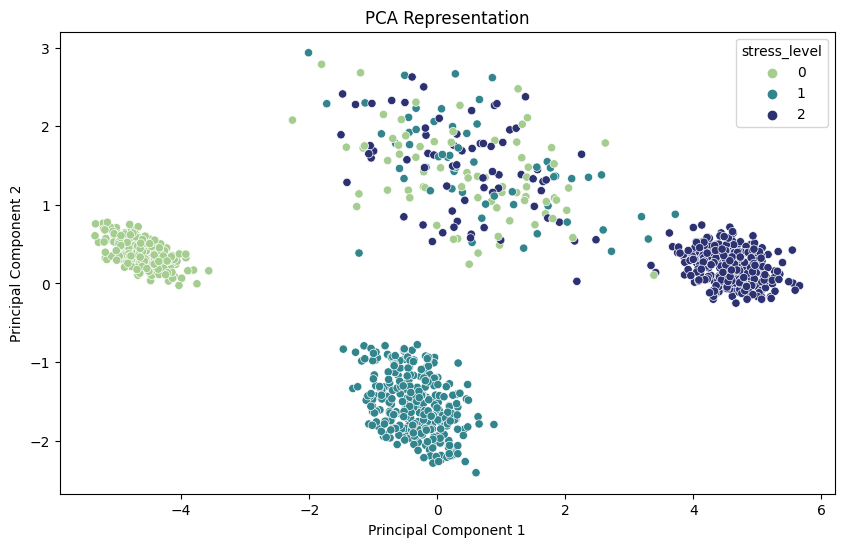

In [23]:
# 2 components explain most of the variance

# Fit PCA with 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot PCA representation
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='crest') #cividis
plt.title('PCA Representation')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


Bu kod bloğu, PCA tarafından açıklanan varyans oranlarını hesaplar ve ekrana yazdırır. Bu oranlar, her bir bileşenin veri setindeki toplam varyansın ne kadarını açıkladığını gösterir. Ayrıca, toplam açıklanan varyansı hesaplayarak, veri setindeki varyansın ne kadarının korunduğunu belirler.

In [24]:
# Explained Variance Ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

# Total variance explained
total_variance_explained = np.sum(explained_variance_ratio)
print("Total Variance Explained:", total_variance_explained)

Explained Variance Ratio: [0.59556883 0.0598072 ]
Total Variance Explained: 0.6553760321739773


Bu kod bloğu, PCA'nın temel bileşenlerinin yük vektörlerini (loading coefficients) hesaplar ve bu yük vektörlerini bir veri çerçevesinde gösterir. Her bir özellik için her bir temel bileşenle ilişkisini gösterir. Bu, veri setindeki özelliklerin temel bileşenlerle nasıl ilişkilendiğini anlamamıza yardımcı olur.

In [25]:
# Access loading coefficients for all variables
loadings = pca.components_

# DataFrame to display loadings
loadings_df = pd.DataFrame(loadings.T, columns=['PC1', 'PC2'], index=X.columns)

print("Loadings for all variables in relation to Principal Components:")
print(loadings_df)

Loadings for all variables in relation to Principal Components:
                                   PC1       PC2
anxiety_level                 0.244210 -0.110991
self_esteem                  -0.242044 -0.150180
mental_health_history         0.218941 -0.117791
depression                    0.242709  0.043058
headache                      0.229389 -0.013129
blood_pressure                0.145111  0.744448
sleep_quality                -0.240323  0.135139
breathing_problem             0.189994 -0.299749
noise_level                   0.208863 -0.015639
living_conditions            -0.198625  0.095483
safety                       -0.229310  0.084962
basic_needs                  -0.226792  0.106306
academic_performance         -0.229500  0.135306
study_load                    0.204304  0.004518
teacher_student_relationship -0.236666 -0.000133
future_career_concerns        0.247480  0.008254
social_support               -0.217857 -0.480639
peer_pressure                 0.226360 -0.025430
extra

Bu kod bloğu, orijinal değişkenler ile temel bileşenler arasındaki korelasyon yüklerini hesaplar. Temel bileşenlerin yük vektörleri ile açıklanan varyansın karekökü arasındaki çarpımı alınarak bu korelasyonlar bulunur. Sonrasında, belirlenen bir kesme değeri (cutoff) kullanılarak önemli korelasyon yükleri filtrelenir. Bu yüksek korelasyonlar, orijinal değişkenlerin hangi temel bileşenlerle güçlü bir şekilde ilişkili olduğunu gösterir. Bu, veri setindeki değişkenlerin temel bileşenler tarafından nasıl temsil edildiğini anlamamıza yardımcı olur.

In [26]:
# Correlation Loadings between original variables and principal components
correlation_loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
correlation_loadings_df = pd.DataFrame(correlation_loadings, columns=['PC1', 'PC2'], index=X.columns)


# cutoff threshold for correlation loadings
cutoff = 0.5  

# Filtering the data frame to only include values above cutoff
significant_correlation_loadings_df = correlation_loadings_df.where(
    lambda x: abs(x) > cutoff).dropna(how='all').fillna('')

print("Significant Correlation Loadings for all variables in relation to Principal Components:")
print(significant_correlation_loadings_df)


Significant Correlation Loadings for all variables in relation to Principal Components:
                                   PC1       PC2
anxiety_level                 0.843223          
self_esteem                  -0.835742          
mental_health_history         0.755971          
depression                    0.838038          
headache                      0.792047          
blood_pressure                0.501046  0.814561
sleep_quality                -0.829801          
breathing_problem             0.656022          
noise_level                   0.721175          
living_conditions            -0.685823          
safety                       -0.791775          
basic_needs                  -0.783082          
academic_performance         -0.792432          
study_load                    0.705434          
teacher_student_relationship -0.817175          
future_career_concerns        0.854514          
social_support               -0.752228 -0.525907
peer_pressure                 

In [27]:
# FA
# from factor_analyzer import FactorAnalyzer

# # Create factor analysis object and perform factor analysis
# fa = FactorAnalyzer(rotation='varimax', n_factors=2)
# fa.fit(X_scaled)

# # Get the factor loadings
# loadings = fa.loadings_

# # Create a DataFrame to display loadings
# loadings_df = pd.DataFrame(loadings, columns=['Factor 1', 'Factor 2'], index=X.columns)

# # cutoff threshold for correlations
# cutoff = 0.5

# # Filter the DataFrame to only include values above or below the cutoff
# significant_loadings_df = loadings_df.where(
#     lambda x: abs(x) > cutoff).dropna(how='all').fillna('')
# print("Significant Loadings for all variables in relation to Factors:")
# print(significant_loadings_df)

Observations
- Focused on using PCA more so for latent varuable discovery as compared to dimensionality reduction.
    - So can accept lower cumalative explained variance.
    - Will focus on examinig the correlation loadings more so than the variance.
- PCA with two components determined by elbow only led to %65 explained variance.
- Most variables had the highest correlation with the first PC except blood pressure that had the highest correlation with PC2.
- FA gave simialr results except the second factor also had a higher correlation with social support and not only blood pressure.


# Cluster Analysis

### How many clusters to use? 
Will use these methods as starting points and experiment to see if get better results with a different number of clusters


Bu kod bloğu, kümeleme analizi için optimal küme sayısını belirlemek için dirsek yöntemini kullanır. Her bir küme sayısı için bir KMeans modeli oluşturarak, her modelin küme içi kareler toplamını (WCSS) hesaplar. Daha sonra, WCSS değerlerini küme sayısına karşı çizgi grafiği ile görselleştirir. Dirsek yöntemi, bu grafiği inceleyerek, küme sayısının artmasıyla WCSS'nin nasıl azaldığını ve kırılma noktasından sonra azalma hızının yavaşladığını belirler. Kırılma noktasının olduğu küme sayısı, optimal küme sayısı olarak kabul edilir.

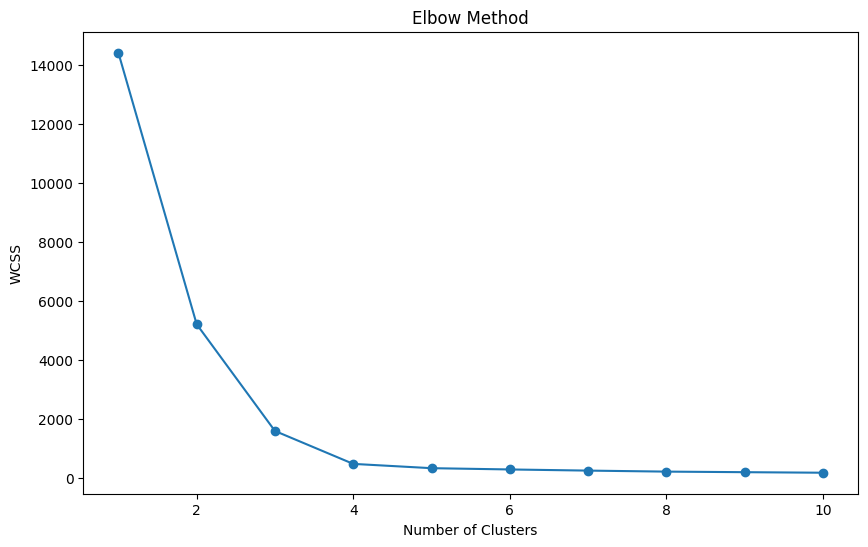

In [28]:
# Determine the optimal number of clusters using the elbow method
wcss = []
max_clusters = 10
for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


Bu kod, kümeleme analizi için optimal küme sayısını belirlemek için siluet skoru yöntemini kullanır. Siluet skoru, her bir veri noktasının kendi kümesi içindeki benzerliğini, diğer kümelere olan farklılığı ile karşılaştırarak hesaplanır. Bu skor, veri noktalarının doğru kümelere atanıp atanmadığını değerlendirmeye yardımcı olur. Kod, farklı küme sayıları için siluet skorlarını hesaplar ve en yüksek siluet skoruna sahip olan küme sayısını belirler. Bu sayede, veri setinin nasıl kümeleneceği hakkında bir fikir elde edilir.

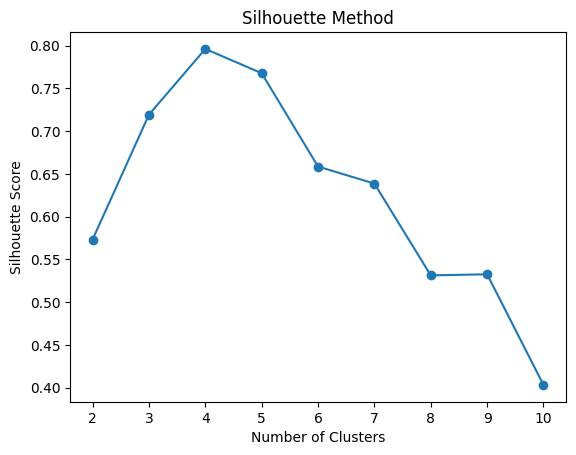

Optimal number of clusters: 4


In [29]:
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

# Initialize a list to store silhouette scores for different numbers of clusters
silhouette_scores = []

# Specify the range of clusters to try
max_clusters = 10
for n_clusters in range(2, max_clusters + 1):
    # Initialize KMeans with n_clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_pca)
    
    # Compute silhouette score
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores
plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o', linestyle='-')
plt.title('Silhouette Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Find the optimal number of clusters
optimal_num_clusters = np.argmax(silhouette_scores) + 2  # Adding 2 because we started from 2 clusters
print("Optimal number of clusters:", optimal_num_clusters)


Bu kod bloğu, KMeans kümeleme algoritması kullanılarak veri setindeki gözlemleri belirli sayıda kümelere ayırır ve bu kümelemeyi görselleştirir. Kümeleme sonucunda elde edilen her bir gözlem, iki boyutta (birinci ve ikinci temel bileşenler) bir nokta olarak gösterilir ve küme etiketlerine göre renklendirilir. Bu görselleştirme, veri setindeki yapıları ve benzerlikleri anlamak için kullanılır.








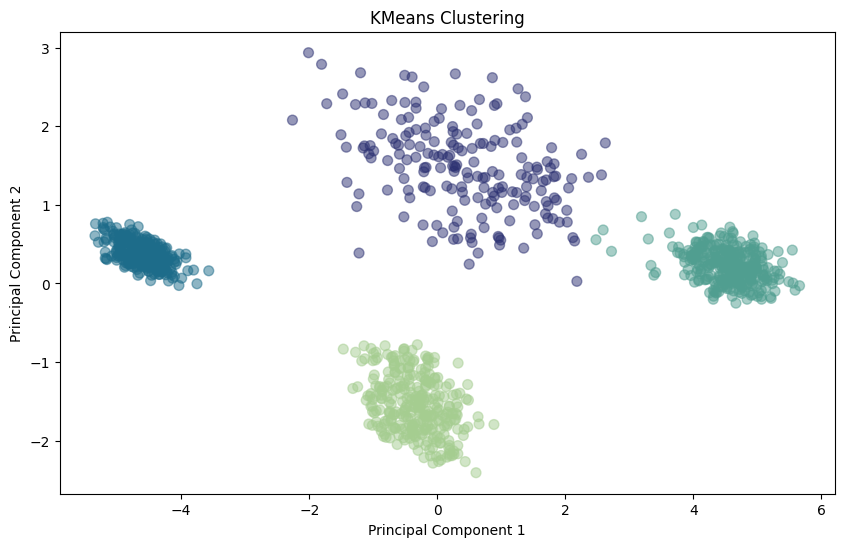

In [30]:
# KMeans clustering
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(X_pca)
cluster_labels = kmeans.labels_

# Add cluster labels to the new DataFrame
clustered_data = myd.copy()
clustered_data['cluster'] = cluster_labels


# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='crest', s=50, alpha=0.5)
plt.title('KMeans Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()



Bu kod, her bir kümeye atanan gözlemlerin ortalamasını hesaplar. Kümelere atanan gözlemlerin ortalaması, her bir kümeye ait bir "merkezi" temsil eder. Bu merkezler, kümeye ait özelliklerin ortalama değerleridir ve bu nedenle kümenin karakteristik özelliklerini temsil eder. Bu, veri setindeki kümelerin özelliklerini daha iyi anlamak için kullanılır.

In [31]:
# Examine the clusters means
clustered_data.groupby('cluster').mean()

anxiety_level  self_esteem  mental_health_history  depression  \
cluster                                                                  
0            11.410000    19.980000               0.513333   11.640000   
1            17.948052     7.899351               0.996753   21.305195   
2             4.190000    27.430000               0.000000    4.096667   
3            10.218750    15.098958               0.421875   13.166667   

         headache  blood_pressure  sleep_quality  breathing_problem  \
cluster                                                               
0        2.483333             1.0       2.456667           3.026667   
1        3.935065             3.0       0.996753           3.951299   
2        1.000000             2.0       4.486667           1.513333   
3        2.614583             3.0       2.791667           2.343750   

         noise_level  living_conditions  ...  basic_needs  \
cluster                                  ...                
0           2.523333           2.483333  ...     2.513333   
1           4.009740           1.525974  ...     1.522727   
2           1.470000           3.526667  ...     4.520000   
3           2.505208           2.588542  ...     2.453125   

         academic_performance  study_load  teacher_student_relationship  \
cluster                                                                   
0                    2.473333    2.486667                      2.483333   
1                    1.500000    3.957792                      1.470779   
2                    4.506667    1.490000                      4.466667   
3                    2.572917    2.458333                      1.953125   

         future_career_concerns  social_support  peer_pressure  \
cluster                                                          
0                      2.460000        2.526667       2.466667   
1                      4.470779        0.987013       4.490260   
2                      1.000000        3.000000       1.523333   
3                      2.598958        0.562500       2.229167   

         extracurricular_activities  bullying  stress_level  
cluster                                                      
0                          2.483333  2.560000      1.000000  
1                          4.422078  4.431818      1.977273  
2                          1.490000  1.000000      0.000000  
3                          2.552083  2.322917      0.973958  

[4 rows x 21 columns]


Bu kod bloğu, her bir kümenin boyutunu hesaplar. Yani, her bir kümede bulunan gözlem sayısını belirler. Bu, her kümenin ne kadar büyük veya küçük olduğunu anlamak için kullanılabilir. Bu bilgi, kümeleme sonuçlarını daha iyi anlamak ve farklı kümeler arasındaki dengeyi değerlendirmek için önemlidir.

In [32]:
# cluster size
cluster_sizes = clustered_data['cluster'].value_counts()
cluster_sizes

cluster
1    308
0    300
2    300
3    192
Name: count, dtype: int64

Bu kod, küme etiketleri ile stres seviyeleri arasındaki ilişkiyi incelemek için bir çapraz tablo oluşturur. Çapraz tablo, her bir küme içindeki stres seviyelerinin dağılımını gösterir. normalize='index' parametresi, her bir satırın toplamına göre normalize edilmesini sağlar, böylece her bir kümedeki stres seviyelerinin oransal dağılımını elde edersiniz. Bu, kümeleme sonuçlarını daha ayrıntılı olarak analiz etmek ve küme etiketleri ile stres seviyeleri arasındaki ilişkiyi anlamak için kullanılır.

In [33]:

pd.crosstab(clustered_data['cluster'], clustered_data['stress_level'], normalize='index')


stress_level         0         1         2
cluster                                   
0             0.000000  1.000000  0.000000
1             0.003247  0.016234  0.980519
2             1.000000  0.000000  0.000000
3             0.375000  0.276042  0.348958

- Cluster 1 has the highest average stress level and worst averages for most varaibles.
- Cluster 2 on the other hand has an average of 0 stress level and contains those with positive average scores for most variables, notably an average of 4.5/5 for sleep quality, basic needs and academic performance as well as no prior mental health issues.

# Predictive Models


Bu kod bloğu, veri setini eğitim ve test setlerine böler, bir Karar Ağacı Sınıflandırıcısı modeli oluşturur, bu modeli eğitir, test veri seti üzerinde tahminler yapar ve sınıflandırma raporu ile modelin performansını değerlendirir. Bu, modelin ne kadar iyi çalıştığını anlamak için kullanılır.

In [34]:
# Decision Tree Classifier
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.91      0.89      0.90        76
           1       0.87      0.90      0.89        73
           2       0.88      0.86      0.87        71

    accuracy                           0.89       220
   macro avg       0.89      0.89      0.89       220
weighted avg       0.89      0.89      0.89       220



Bu kod bloğu, bir Rastgele Orman Sınıflandırıcısı (Random Forest Classifier) modeli oluşturur ve bu modeli kullanarak test veri seti üzerinde tahminler yapar. Daha sonra, bu tahminlerin doğruluğunu değerlendirmek için sınıflandırma raporunu (classification report) ekrana yazdırır. Bu rapor, modelin performansını değerlendirmek için kullanılır.

In [35]:
# Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86        76
           1       0.89      0.86      0.88        73
           2       0.88      0.86      0.87        71

    accuracy                           0.87       220
   macro avg       0.87      0.87      0.87       220
weighted avg       0.87      0.87      0.87       220



Bu kod bloğu, Rastgele Orman Sınıflandırıcısı modelindeki özniteliklerin önem derecelerini görselleştirmek için bir çubuk grafiği oluşturur. Çubukların yüksekliği, her özniteliğin modeldeki önemini temsil eder. Bu grafiği inceleyerek, hangi özniteliklerin modelin tahminlerinde daha fazla etkili olduğunu anlayabilirsiniz.

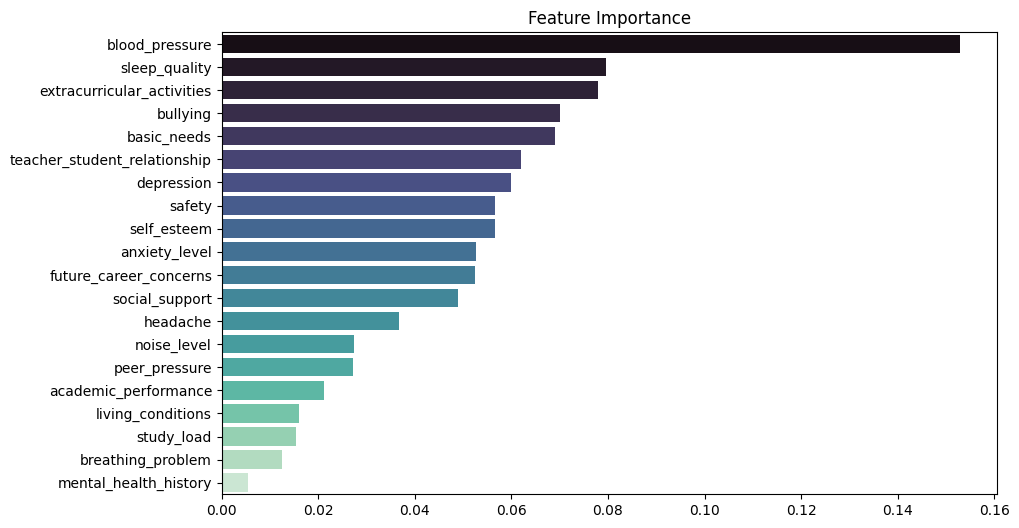

In [36]:
# Plot feature importance
feature_importances = rf.feature_importances_
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances[indices], y=X.columns[indices], palette='mako')
plt.title('Feature Importance')
plt.show()



Bu kod bloğu, Rastgele Orman Sınıflandırıcısı modelinin hiperparametrelerini belirlemek için Grid Search yöntemini kullanır. Grid Search, belirtilen hiperparametre değerleri arasında bir arama yaparak, en iyi performansı sağlayan hiperparametre kombinasyonunu belirler. Bu, modelin daha iyi bir performans elde etmesine ve doğruluğunun artmasına yardımcı olur.

In [37]:
# Hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)
best_rf = grid_search.best_estimator_

print(best_rf)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
{'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
0.8999791042696943
RandomForestClassifier(max_depth=10, min_samples_split=10, random_state=42)


Bu kod bloğu, Grid Search yöntemiyle belirlenen en iyi modeli kullanarak test veri seti üzerinde tahminler yapar ve tahminlerin doğruluğunu değerlendirmek için sınıflandırma raporunu ekrana yazdırır. Bu rapor, modelin performansını değerlendirmek için kullanılır.

In [38]:
# Evaluate the best model
y_pred = best_rf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.89      0.86        76
           1       0.89      0.85      0.87        73
           2       0.93      0.89      0.91        71

    accuracy                           0.88       220
   macro avg       0.88      0.88      0.88       220
weighted avg       0.88      0.88      0.88       220




Bu kod bloğu, Grid Search ile belirlenen en iyi modelin özniteliklerinin önem derecelerini görselleştirmek için bir çubuk grafik oluşturur. Çubukların yüksekliği, her bir özniteliğin modeldeki önemini temsil eder. Bu grafik, modelin hangi özniteliklere daha fazla önem verdiğini ve bu özniteliklerin sınıflandırma sürecinde ne kadar etkili olduğunu gösterir.

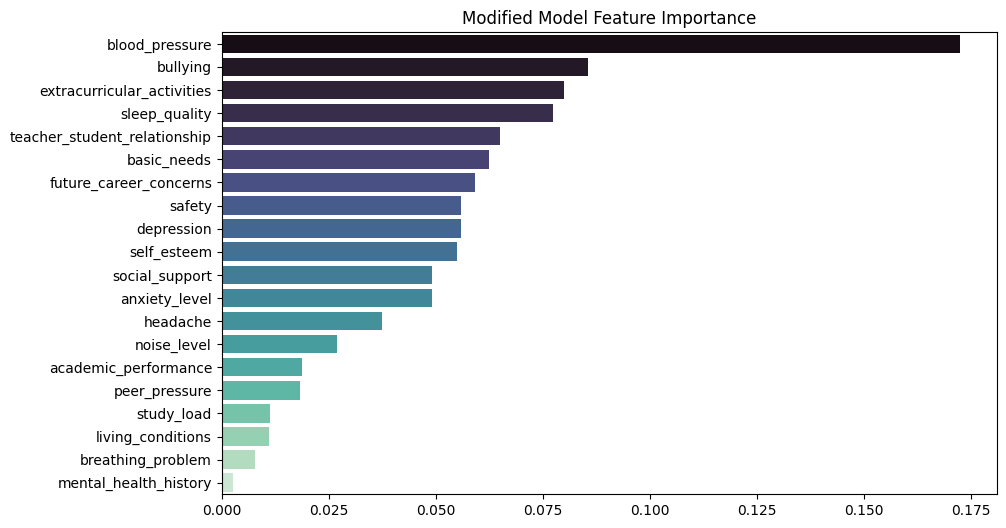

In [39]:
# Feature Importance plot
feature_importances = best_rf.feature_importances_
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances[indices], y=X.columns[indices], palette='mako')
plt.title('Modified Model Feature Importance')
plt.show()

In [40]:
# ordinal regression
# import mord as m

# # Split the data into features and target
# X = myd.drop('stress_level', axis=1)
# y = myd['stress_level']

# # Standardize the data
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# # Fit the OrdinalRidge regression model
# or_model = m.OrdinalRidge()
# or_model.fit(X_train, y_train)

# # Predict the stress level
# y_pred = or_model.predict(X_test)

# # Evaluate the model
# print(classification_report(y_test, y_pred))

